# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection </p>

<img src='image.webp' width='1500'>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=darkblue>Problem:</font></h3>

In this project, we will analyze a dataset containing various financial transaction records, including attributes such as transaction amount, merchant details, and account holder information. The primary goal is to develop a predictive model that accurately identifies fraudulent transactions. Given the severe consequences of allowing fraudulent activities to go undetected, the model's primary focus will be on minimizing false negatives, ensuring that all potential fraudulent transactions are correctly identified. Therefore, maximizing recall for the fraud class is a critical performance metric

<div style="border-radius:10px; padding: 15px; background-color : #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=darkblue>Objectives:</font></h3>

* __Explore the Dataset__: Identify patterns, distributions, and correlations within the financial transaction data.

* __Conduct Extensive Exploratory Data Analysis (EDA)__: Investigate bivariate relationships, particularly between features and the target variable (fraud or not fraud).

* __Preprocessing Steps__:


  -Remove irrelevant or redundant features
  
  -Address missing data entries

  -Handle outliers that may distort model predictions

  -Encode categorical variables appropriately

  -Apply transformations to skewed features for normal-like distributions


* __Model Building__:


  -Create pipelines for models requiring feature scaling

  -Implement and fine-tune classification models such as Logistic Regression, SVM, Decision Trees, and Random Forest

  -Prioritize achieving high recall for the fraud class, ensuring all potential fraudulent transactions are identified

  
* __Evaluate and Compare Model Performance__: Use precision, recall, and F1-score to assess the models' ability to       detect fraud accurately

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=darkblue>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
            - [Histogram](#histogram)
            - [Violin Plot](#violin_plot)
            - [Box Plot](#box_plot)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
            - [Bar Plot](#bar_plot)
            - [Pie Chart](#pie_chart)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
            - [Scatter Plot](#scatter_plot)
            - [Correlation Heatmap](#correlation_heatmap)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
            - [Stacked Bar Plot](#stacked_bar_plot)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Transforming Skewed Features](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_eval)
* [Step 8 | Logistic Regression Model Building](#logistic)
    - [Step 8.1 | Logistic Base Model Definition](#logistic_base)
    - [Step 8.2 | Logistic Hyperparameter Tuning](#logistic_hp)
    - [Step 8.3 | Logistic Model Evaluation](#logistic_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 10 | Conclusion](#conclusion)
* [Step 11 | Prediction](#prediction)
</div>


<a id="read"></a>
# <p style="background-color:#ADD8E6 ; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Liabraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [479]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:#ADD8E6 ; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [480]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [481]:
# Create a dictionary to map old column names to new names
new_column_names = {
    'step': 'time_step',
    'type': 'transaction_type',
    'amount': 'transaction_amount',
    'nameOrig': 'sender',
    'oldbalanceOrg': 'sender_start_balance',
    'newbalanceOrig': 'sender_end_balance',
    'nameDest': 'recipient',
    'oldbalanceDest': 'recipient_start_balance',
    'newbalanceDest': 'recipient_end_balance',
    'isFraud': 'fraudulent'
}

# Rename the columns
df = df.rename(columns=new_column_names)

# Display the updated DataFrame to confirm changes
df.head()


,time_step,transaction_type,transaction_amount,sender,sender_start_balance,sender_end_balance,recipient,recipient_start_balance,recipient_end_balance,fraudulent
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [482]:
df.describe()

,time_step,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h2 align="left"><font color=darkblue>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __step__ | Time step (likely in hours) when the transaction occurred |
| __amount__ | Transaction amount |
| __oldbalanceOrg__ | Balance of the sender before the transaction |
| __newbalanceOrig__ | Balance of the sender after the transaction |
| __oldbalanceDest__ | Balance of the receiver before the transaction |
| __newbalanceDest__ | Balance of the receiver after the transaction |
| __isFraud__ | Indicator of whether the transaction is fraudulent (1 = fraud, 0 = not fraud) |
</div>


<a id="read"></a>
# <p style="background-color:#ADD8E6 ; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview </p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#ADD8E6'>Step 3.1 | Dataset Basic Information</span><span style='color:black'></span></b>

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time_step                11142 non-null  int64  
 1   transaction_type         11142 non-null  object 
 2   transaction_amount       11142 non-null  float64
 3   sender                   11142 non-null  object 
 4   sender_start_balance     11142 non-null  float64
 5   sender_end_balance       11142 non-null  float64
 6   recipient                11142 non-null  object 
 7   recipient_start_balance  11142 non-null  float64
 8   recipient_end_balance    11142 non-null  float64
 9   fraudulent               11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


<a id="basic"></a>
<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=darkblue>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __11,142 entries__, ranging from index 0 to 11,141.
    
    
* __Columns__: There are __7 columns__ in the dataset corresponding to various transaction attributes.
    
    
* __Data Types__:
    - Most of the columns (5 out of 7) are of the __float64__ data type.
    - The `time_step` column is of the __int64__ data type.
    - The `fraudulent` column is of the __int64__ data type.
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 11,142 non-null entries.

</div>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:110%; text-align:left">

__<span style="font-size:130%; color:red"> Note: </span>__ We have identified the features in the dataset based on their data types:
    
* __Numerical Features__: These include features that are of data types `int64` and `float64`, typically representing continuous or discrete numerical values. The identified numerical features are stored in the `numerical_features` list.

* __Categorical Features__: These include features of data types `object` and `category`, typically representing categorical variables with discrete categories or labels. The identified categorical features are stored in the `categorical_features` list.

</div>


In [484]:
# Distribution of transaction types
type_distribution = df['time_step'].value_counts()
type_distribution

time_step
7     2914
1     2708
6     1660
2     1014
5      665
      ... 
54       4
28       4
49       4
29       4
23       2
Name: count, Length: 95, dtype: int64

<a id="num_statistics"></a>
# <b><span style='color:#ADD8E6'>Step 3.2 |</span><span style='color:#ADD8E6'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [485]:
# Get summary statistics for numerical columns
summary_statistics = df.describe()
summary_statistics


,time_step,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Numerical Features:</font></h3>

* __`time_step`__: The average time step is approximately 8.72, with the earliest transaction occurring at step 1 and the latest at step 95.
* __`transaction_amount`__: The average transaction amount is approximately 213,191.5 units, ranging from 2.39 to 10,000,000 units.
* __`sender_start_balance`__: The average balance of the sender before the transaction is around 924,117.3 units, with a range from 0 to 19,900,000 units.
* __`sender_end_balance`__: The average balance of the sender after the transaction is approximately 824,957.6 units, ranging from 0 to 13,000,000 units.
* __`recipient_start_balance`__: The average balance of the receiver before the transaction is about 888,354.1 units, ranging from 0 to 33,000,000 units.
* __`recipient_end_balance`__: The average balance of the receiver after the transaction is approximately 1,103,211 units, with values ranging from 0 to 34,600,000 units.
* __`fraudulent`__: The average value for `fraudulent` is 0.102495, indicating that around 10.25% of the transactions in the dataset are fraudulent.

</div>
``


<a id="cat_statistics"></a>
# <b><span style='color:#ADD8E6'>Step 3.3 |</span><span style='color:#ADD8E6'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [486]:
df.dtypes

time_step                    int64
transaction_type            object
transaction_amount         float64
sender                      object
sender_start_balance       float64
sender_end_balance         float64
recipient                   object
recipient_start_balance    float64
recipient_end_balance      float64
fraudulent                   int64
dtype: object

In [487]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,transaction_type,sender,recipient
count,11142,11142,11142
unique,5,11142,7508
top,PAYMENT,C1305486145,C985934102
freq,5510,1,62


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left"> <h3 align="left"><font color=darkblue>Categorical Features (object data type):</font></h3>
type: There are five unique categories. The most frequent category is "PAYMENT", occurring 5510 times out of 11142 entries.
</div>

In [488]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()


<a id="eda"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="univariate"></a>
# <b><span style='color:#ADD8E6'>Step 4.1 | Univariate Analysis </span><span style='color:black'> </span></b>

<a id="univariate"></a>
# <b><span style='color:#ADD8E6'>Step 4.1.1 | Numerical Variables Univariate Analysis </span><span style='color:black'></span></b>

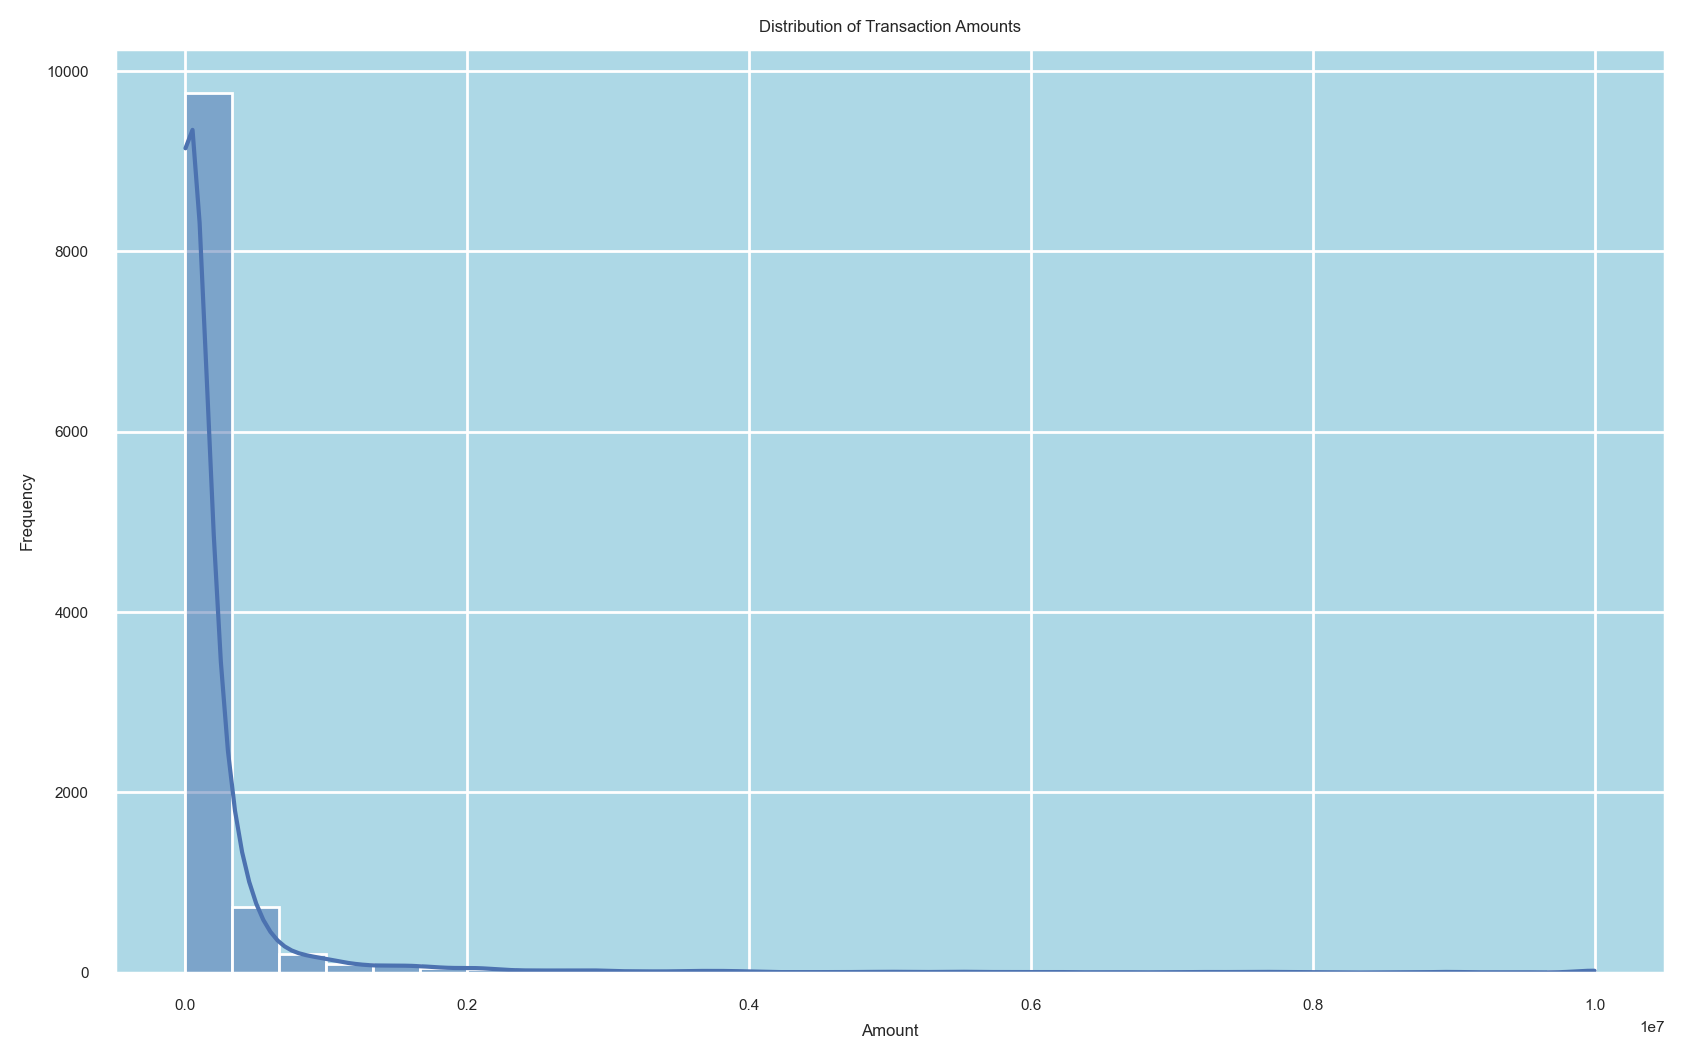

In [489]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_amount'],kde= True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

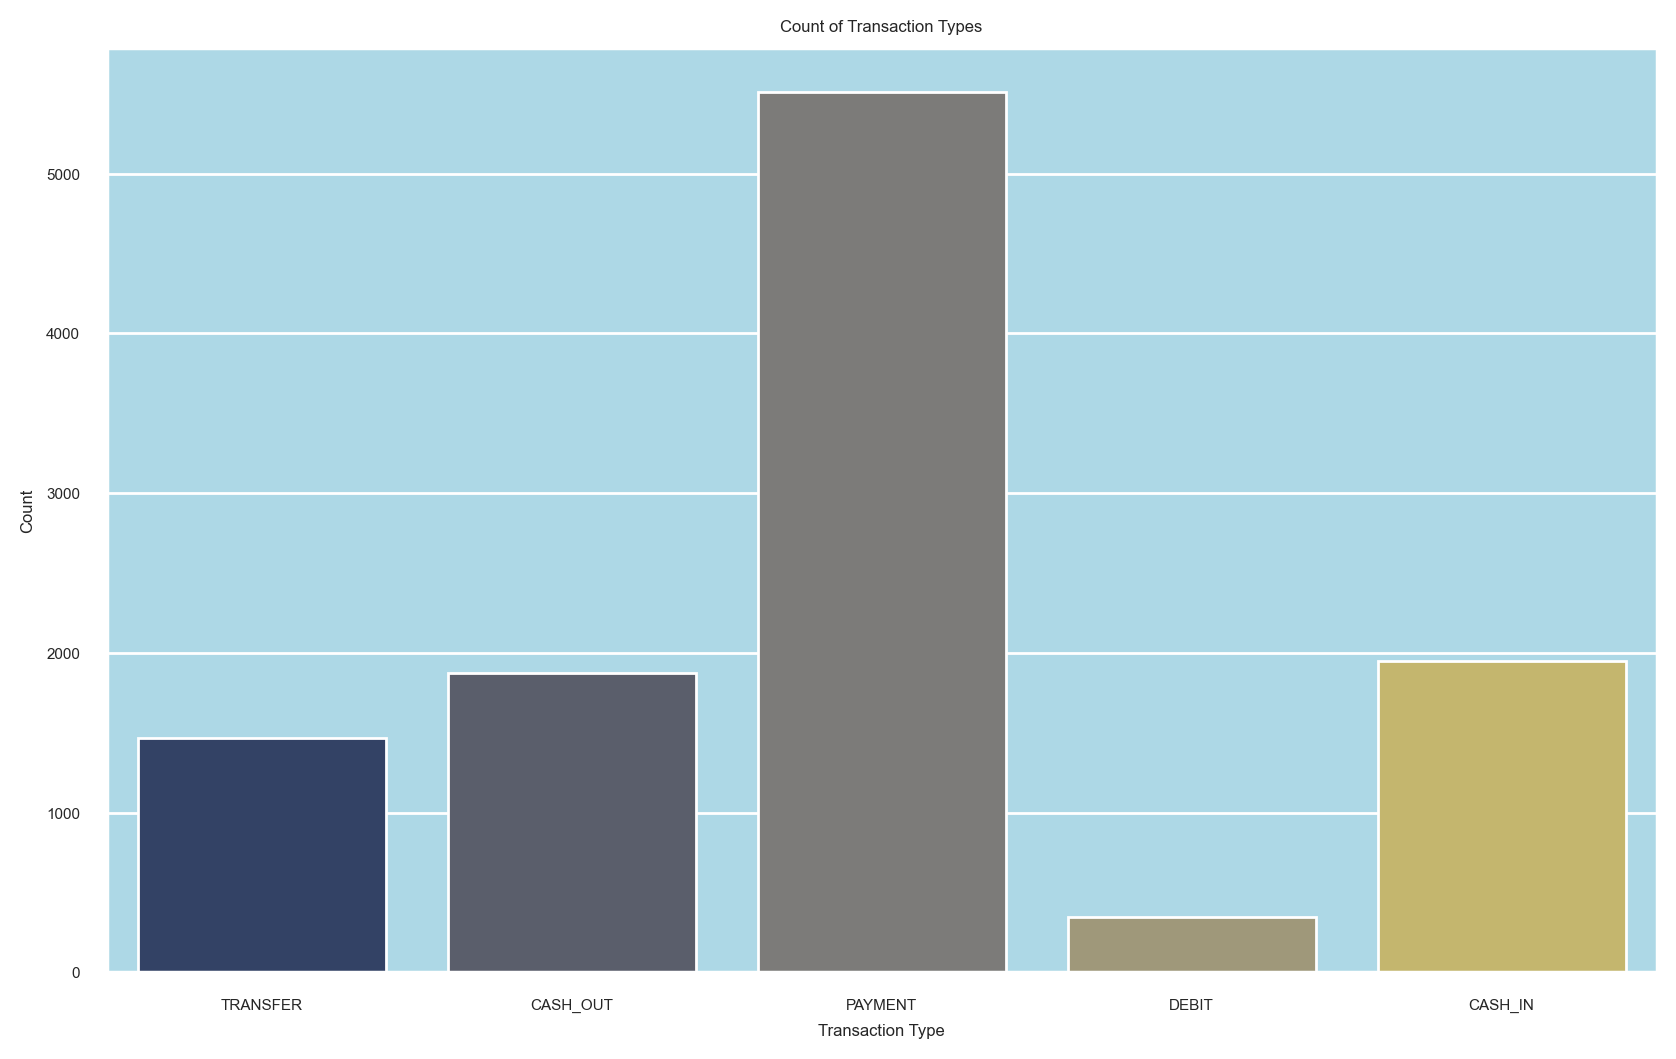

In [490]:
# Count of Transaction Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_type', palette='cividis')
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

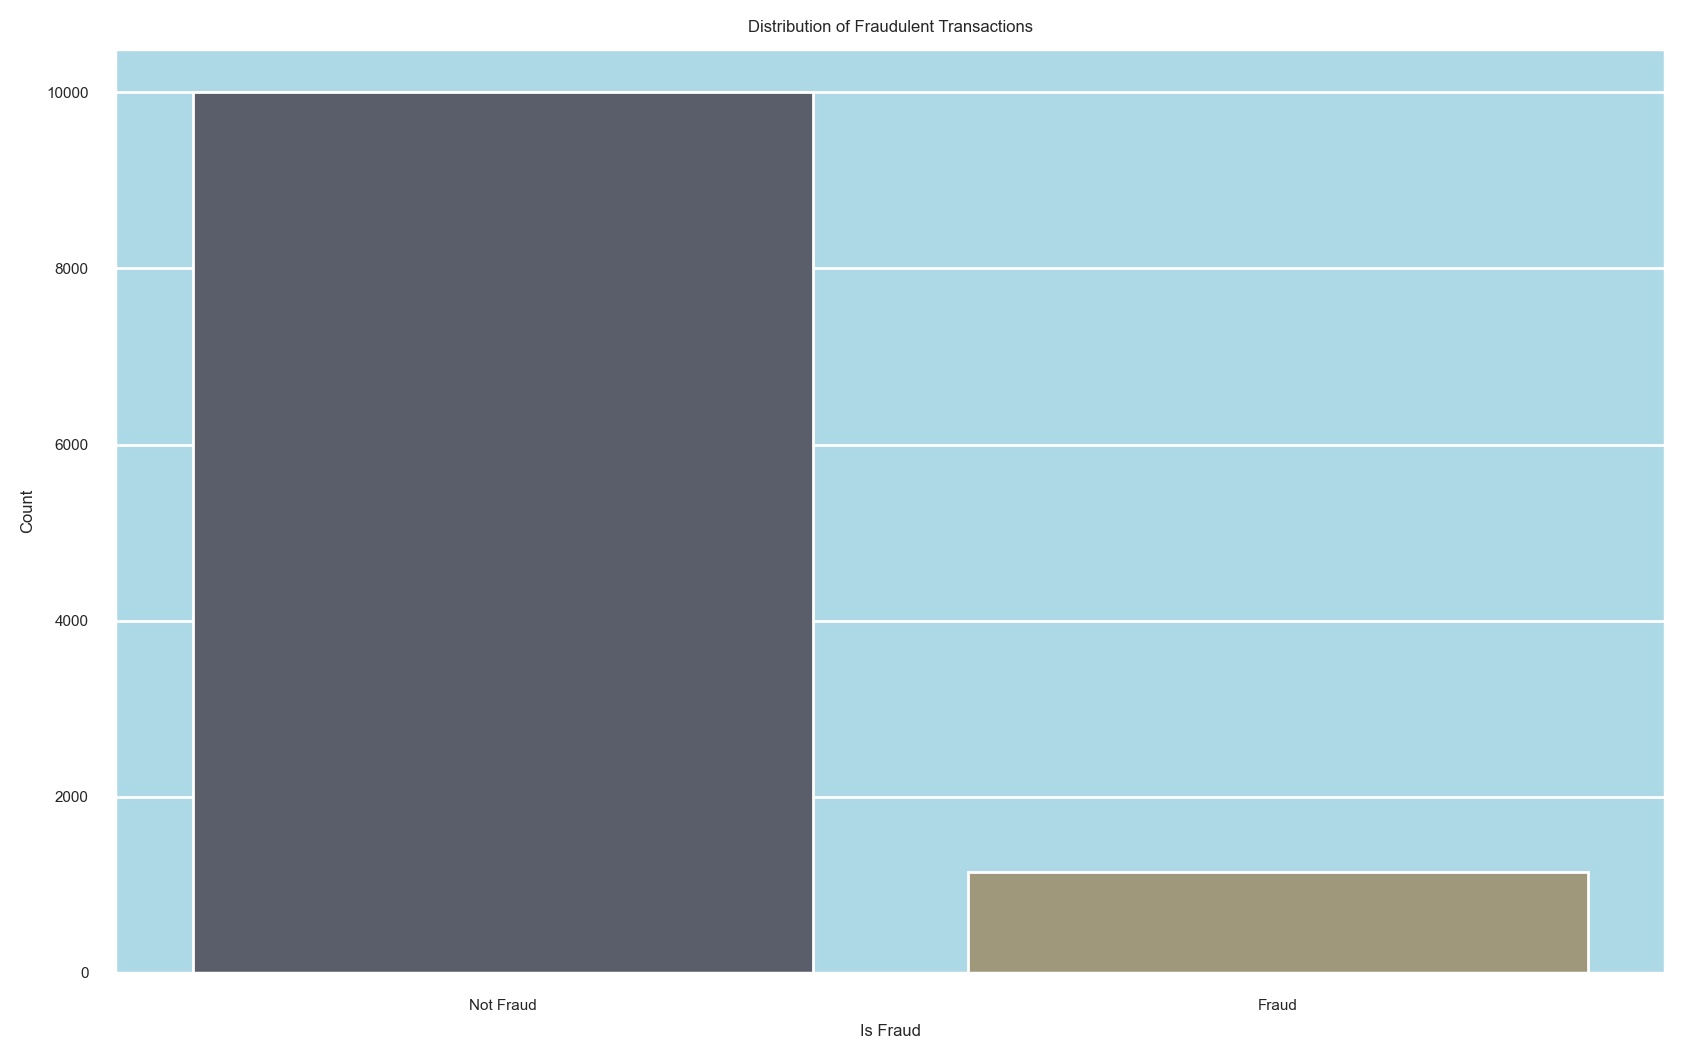

In [491]:
# Distribution of Fradulent Transactions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fraudulent', palette='cividis')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

____
<a id="bivariate"></a>
# <b><span style='color:#ADD8E6'>Step 4.2 |</span><span style='color:#ADD8E6'> Bivariate Analysis</span></b>

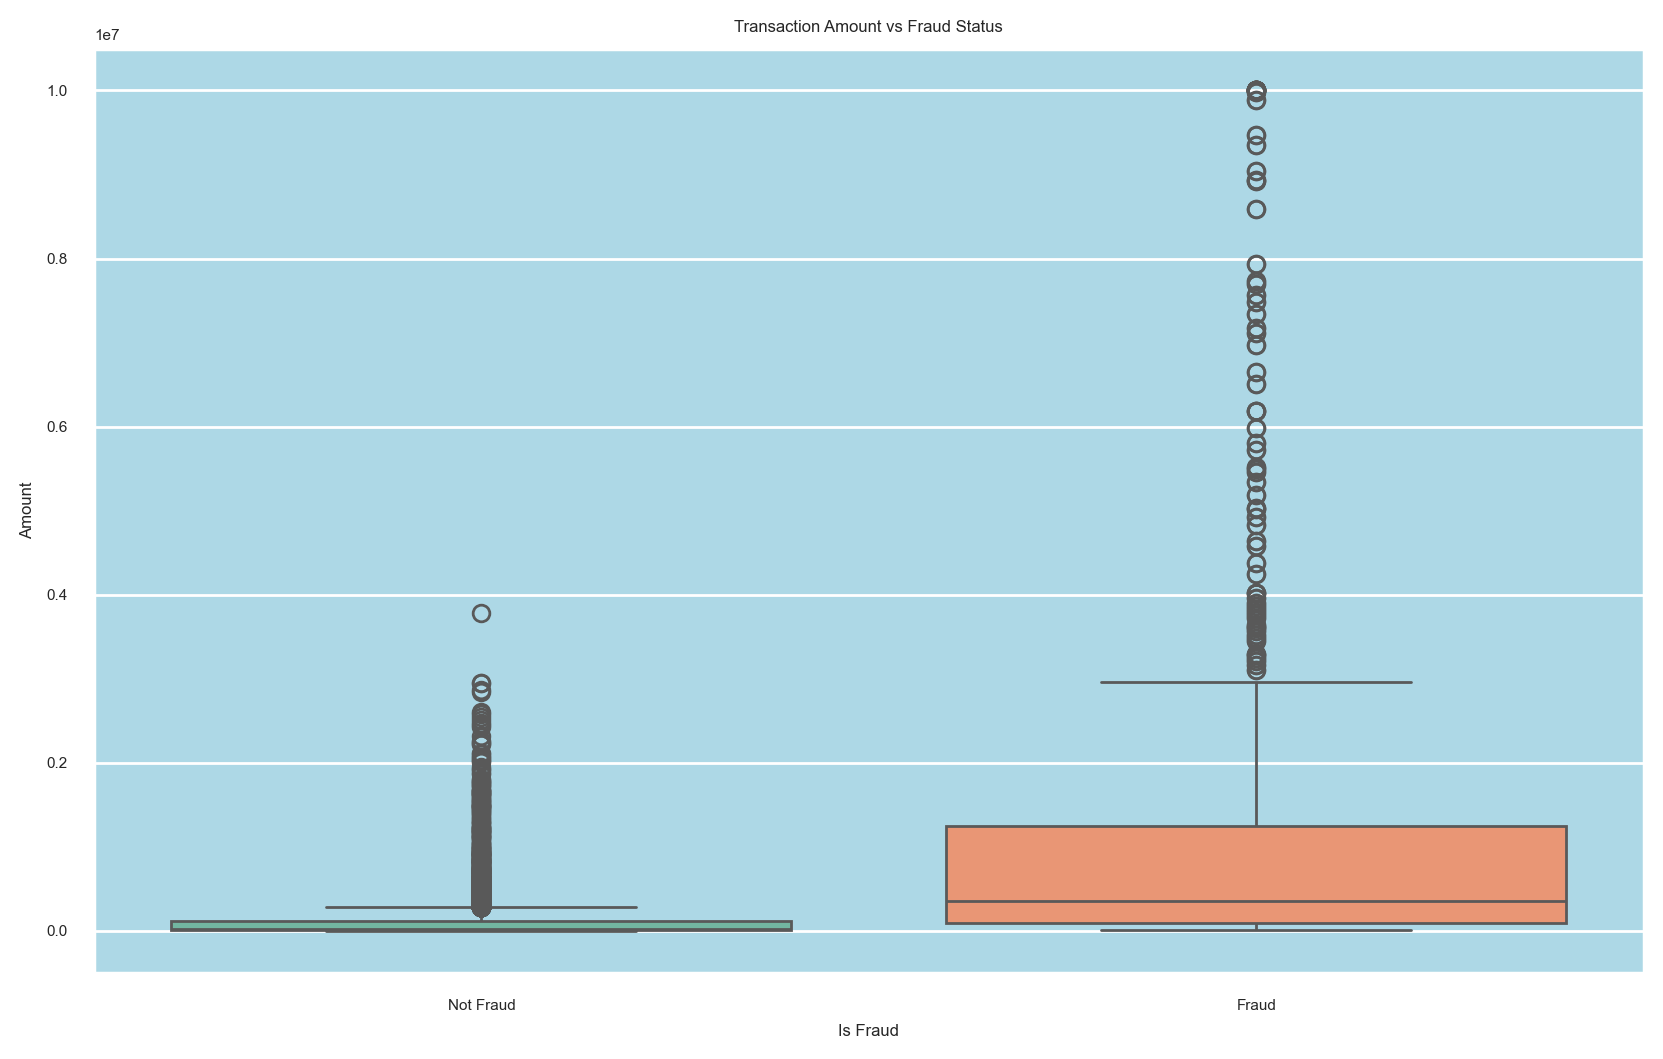

In [492]:
# Transaction Amount vs Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraudulent', y='transaction_amount', palette='Set2')
plt.title('Transaction Amount vs Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

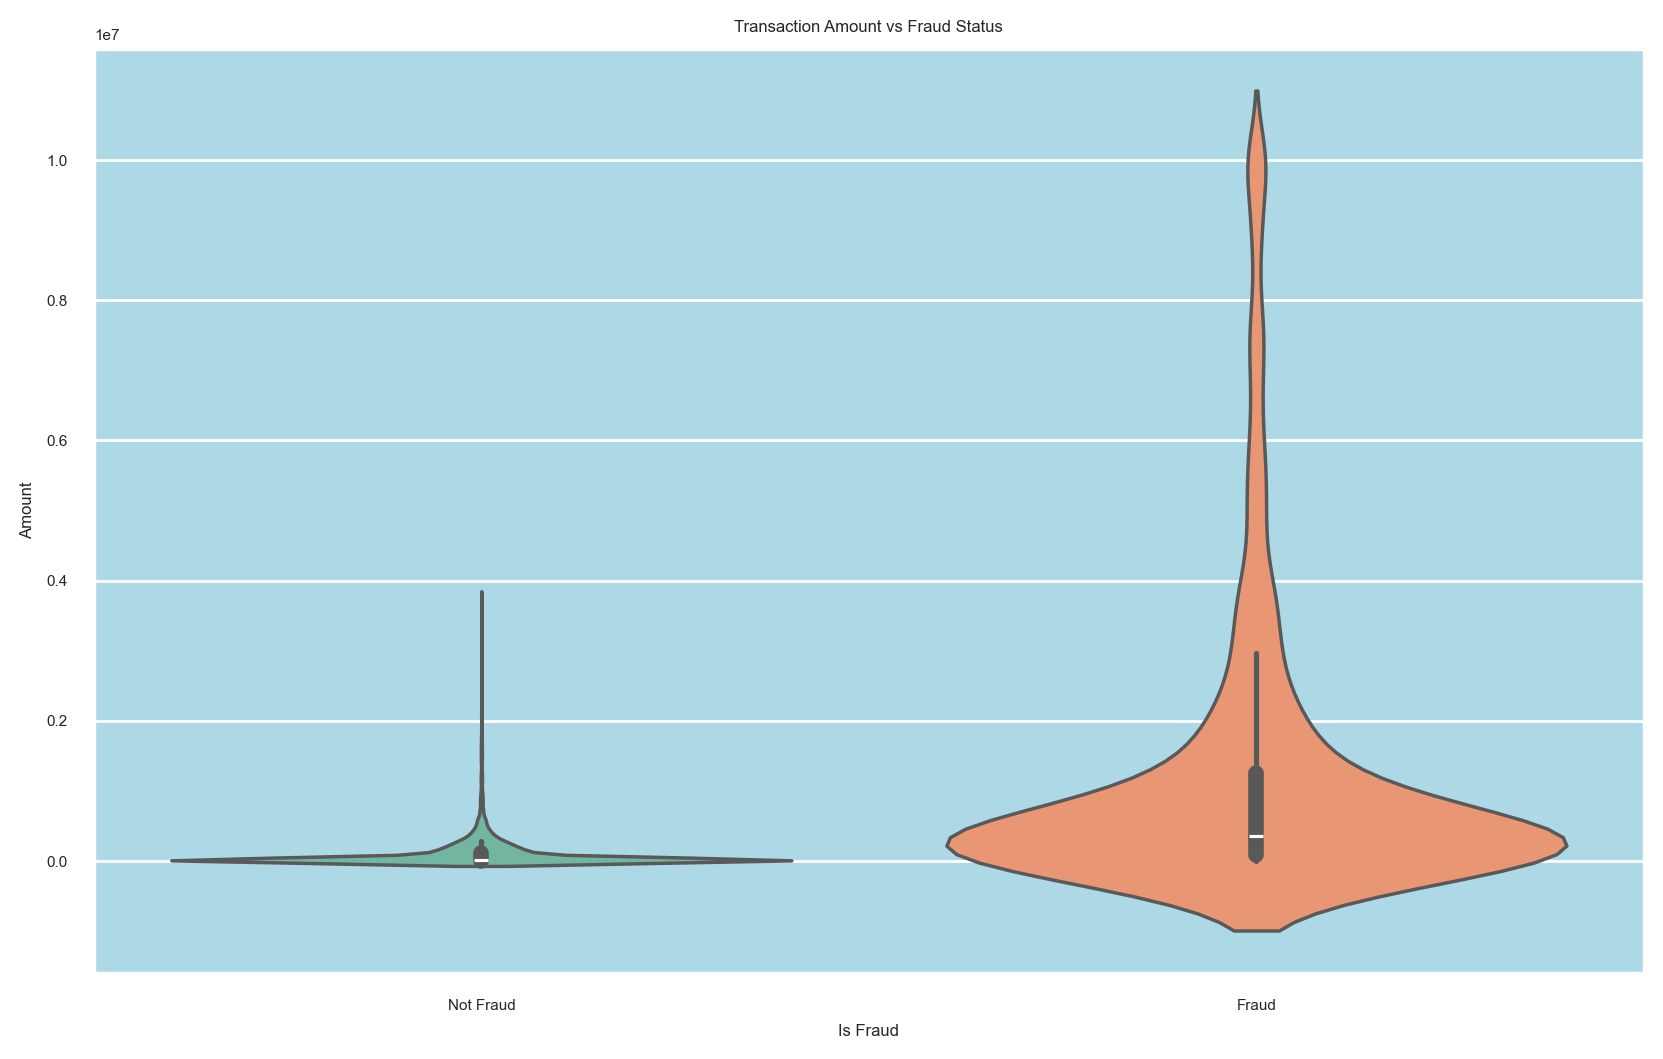

In [493]:
# Transaction Amount vs Fraud Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='fraudulent', y='transaction_amount', palette='Set2')
plt.title('Transaction Amount vs Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

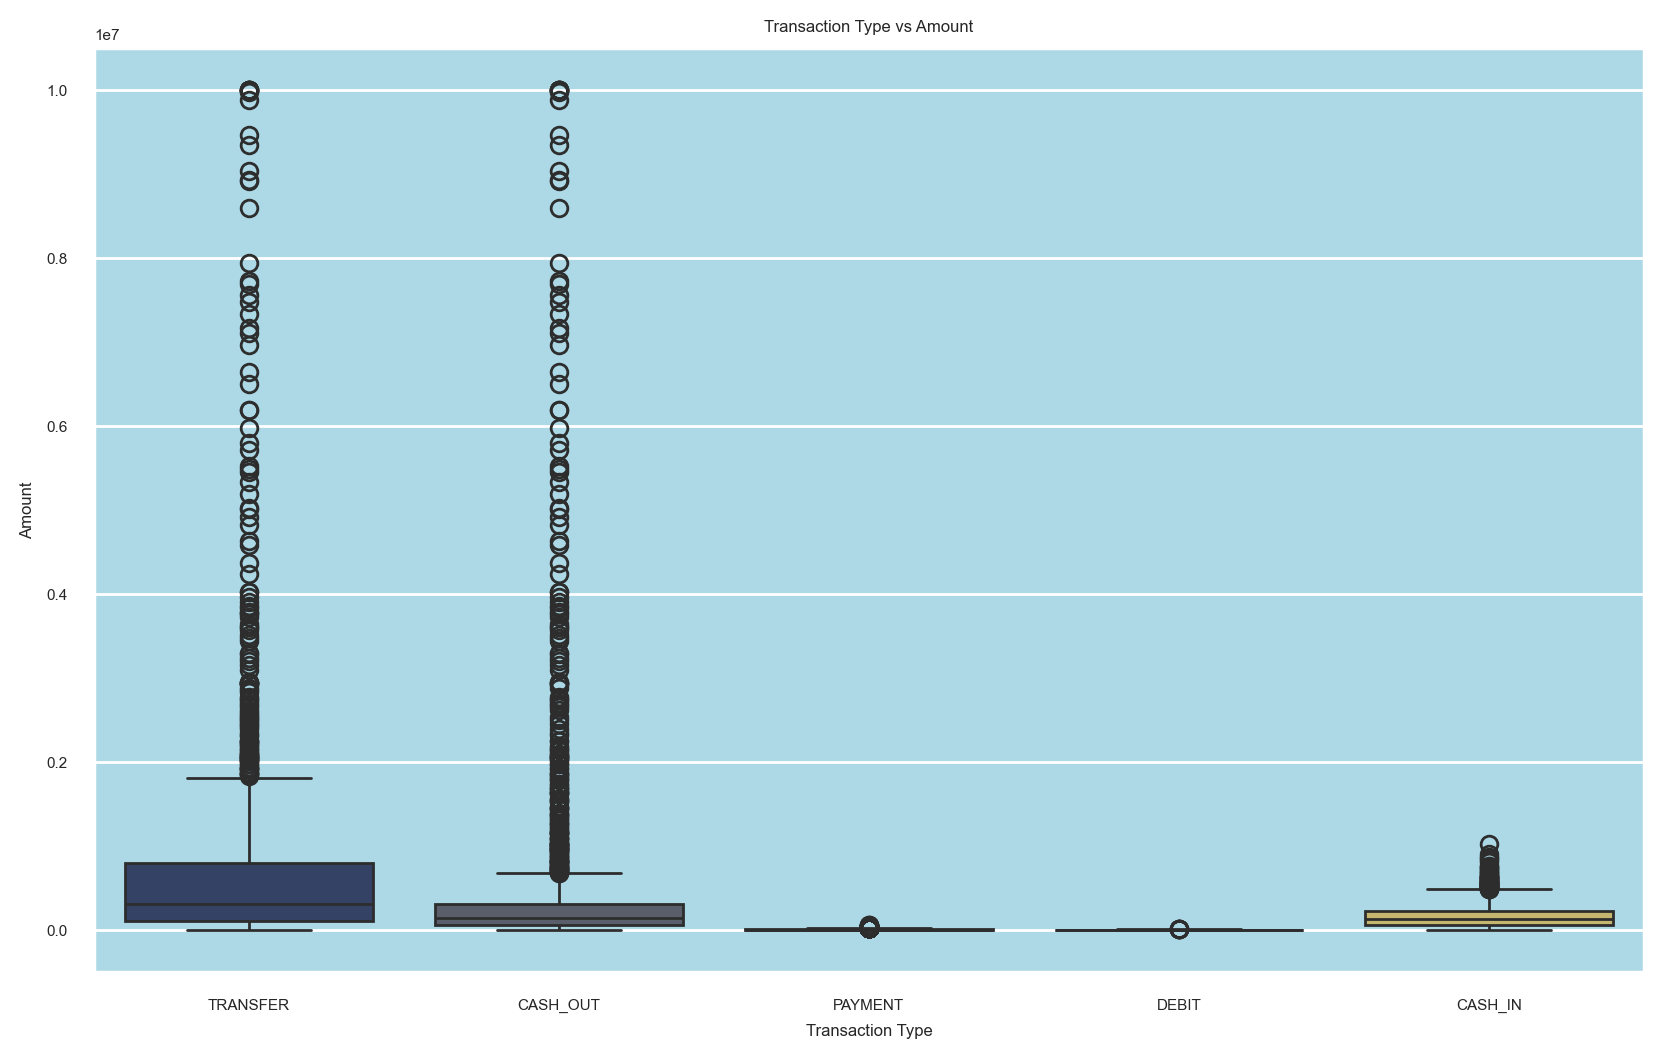

In [494]:
# Transaction Type vs Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transaction_type', y='transaction_amount', palette='cividis')
plt.title('Transaction Type vs Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

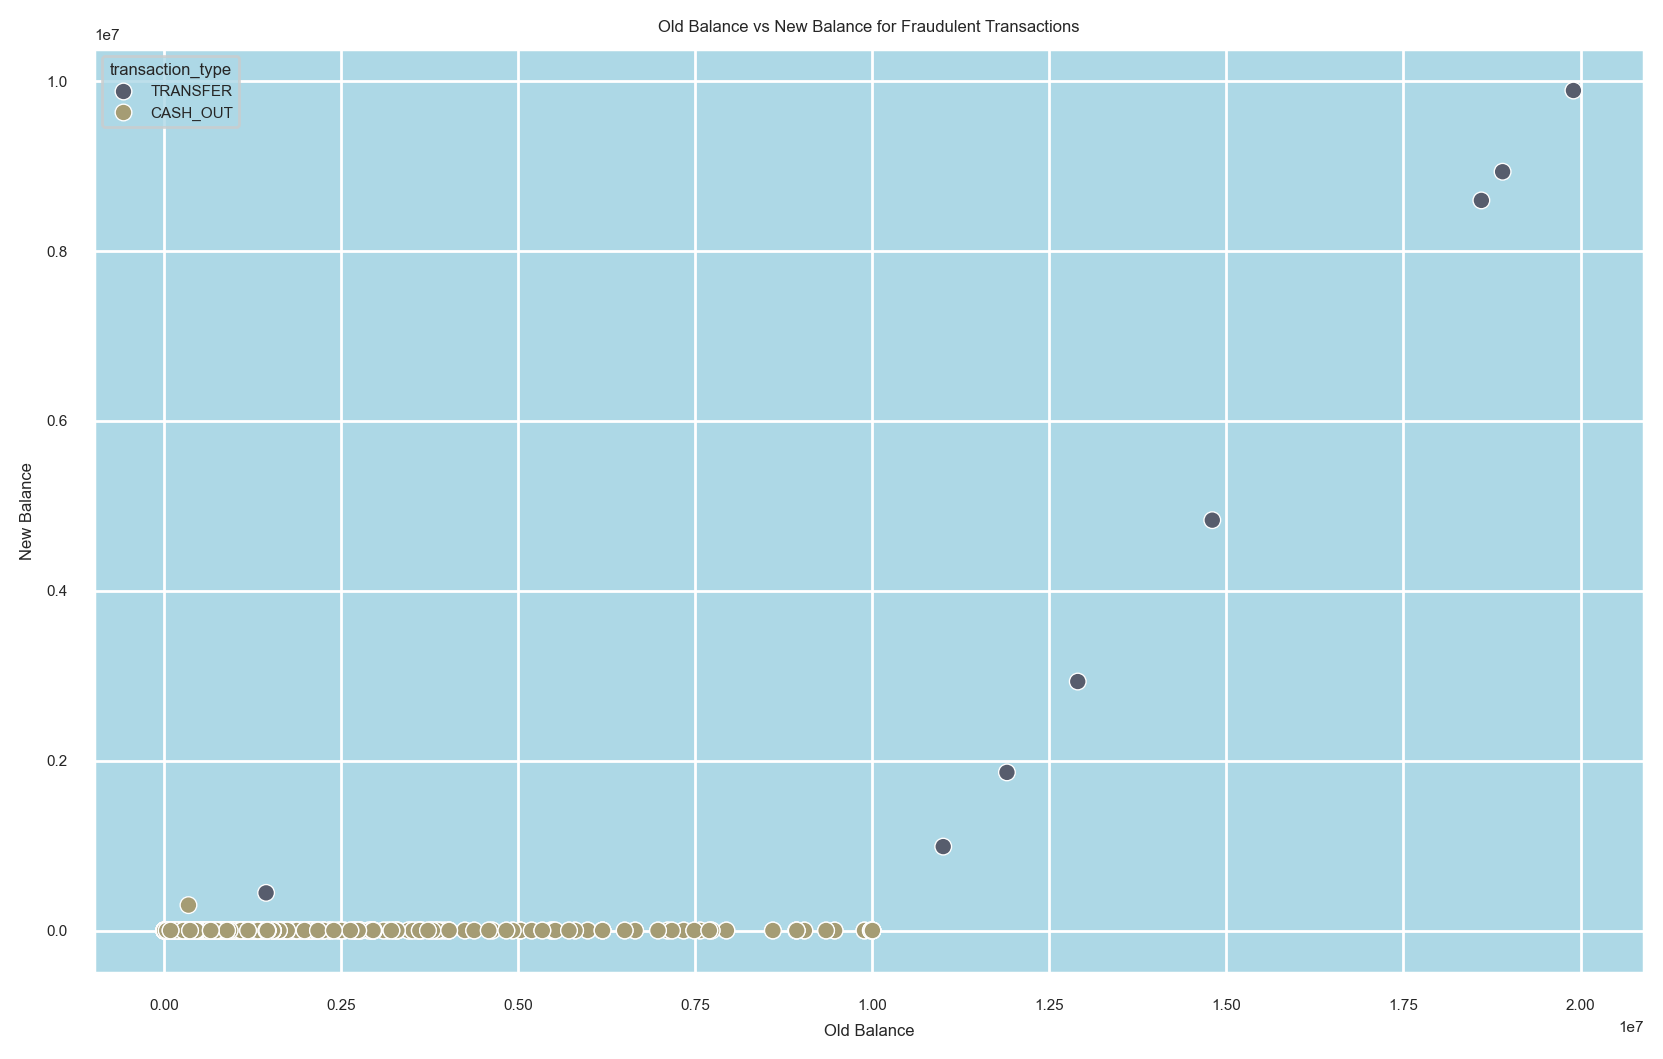

In [495]:
# Old Balance vs New Balance for Fradulent Transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['fraudulent'] == 1], x='sender_start_balance', y='sender_end_balance', hue='transaction_type', palette='cividis')
plt.title('Old Balance vs New Balance for Fraudulent Transactions')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()

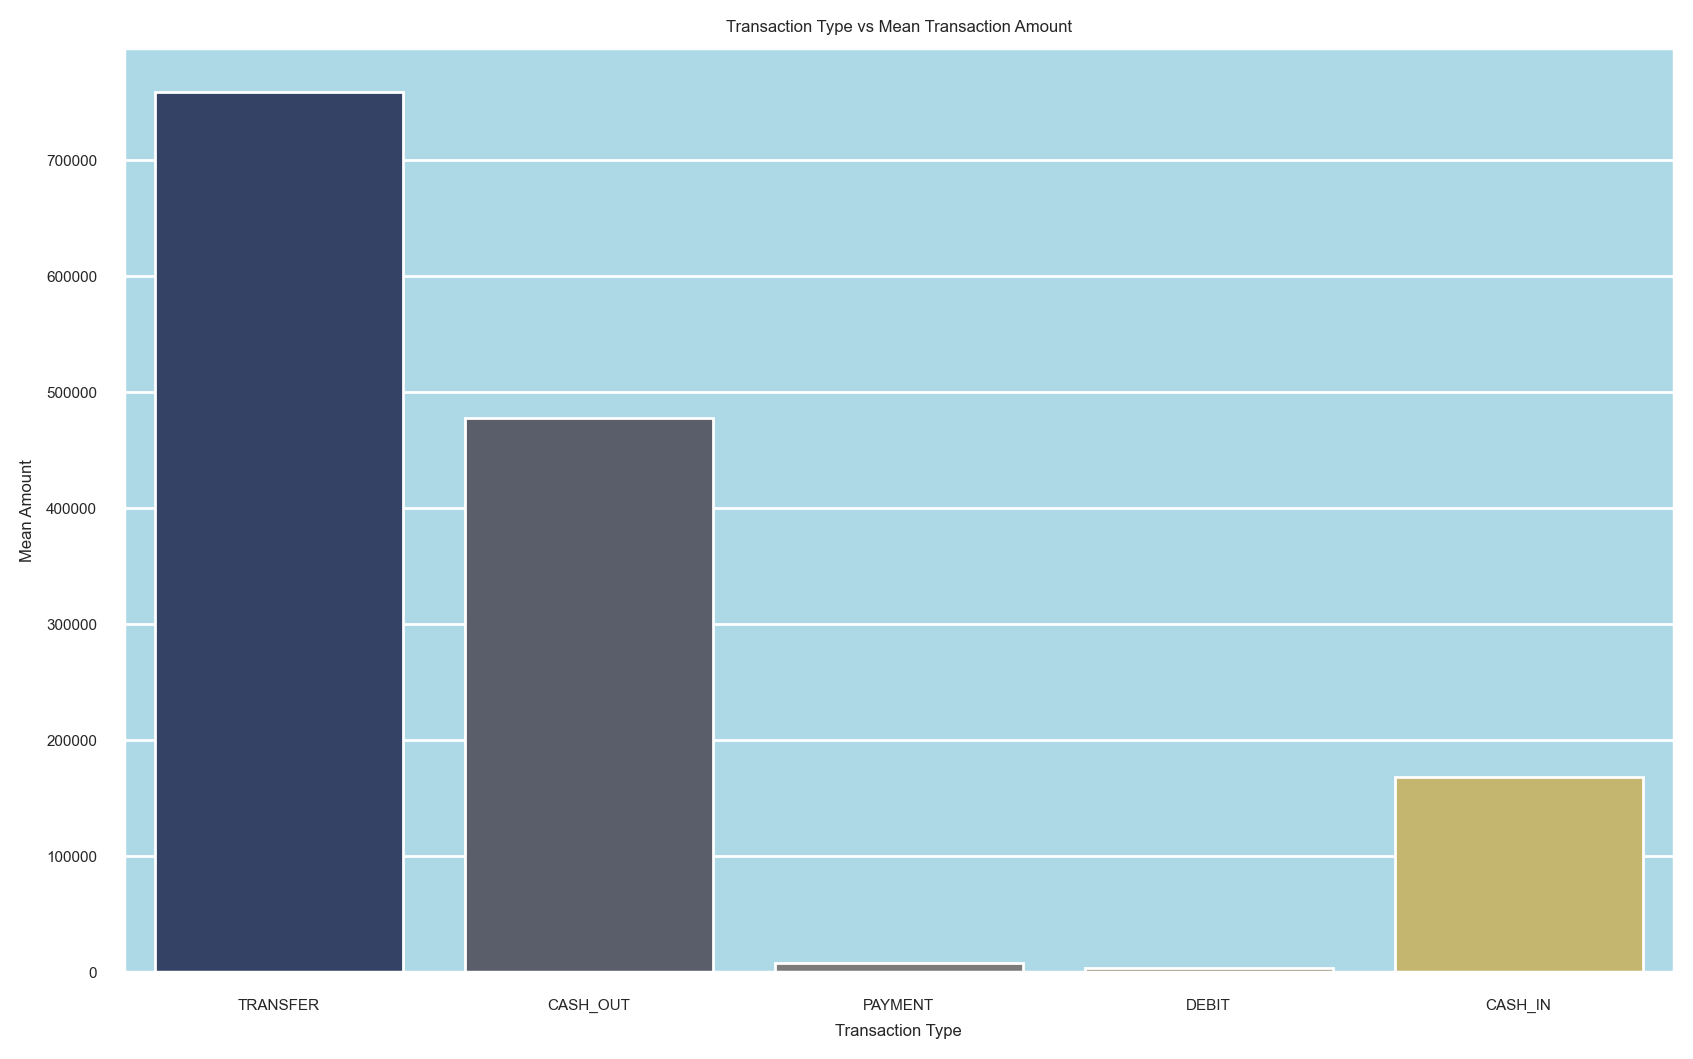

In [496]:
#Bar Plot with Mean Amount: Transaction Type vs. Mean Transaction Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='transaction_type', y='transaction_amount', estimator=lambda x: sum(x)/len(x), ci=None, palette='cividis')
plt.title('Transaction Type vs Mean Transaction Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Mean Amount')
plt.show()

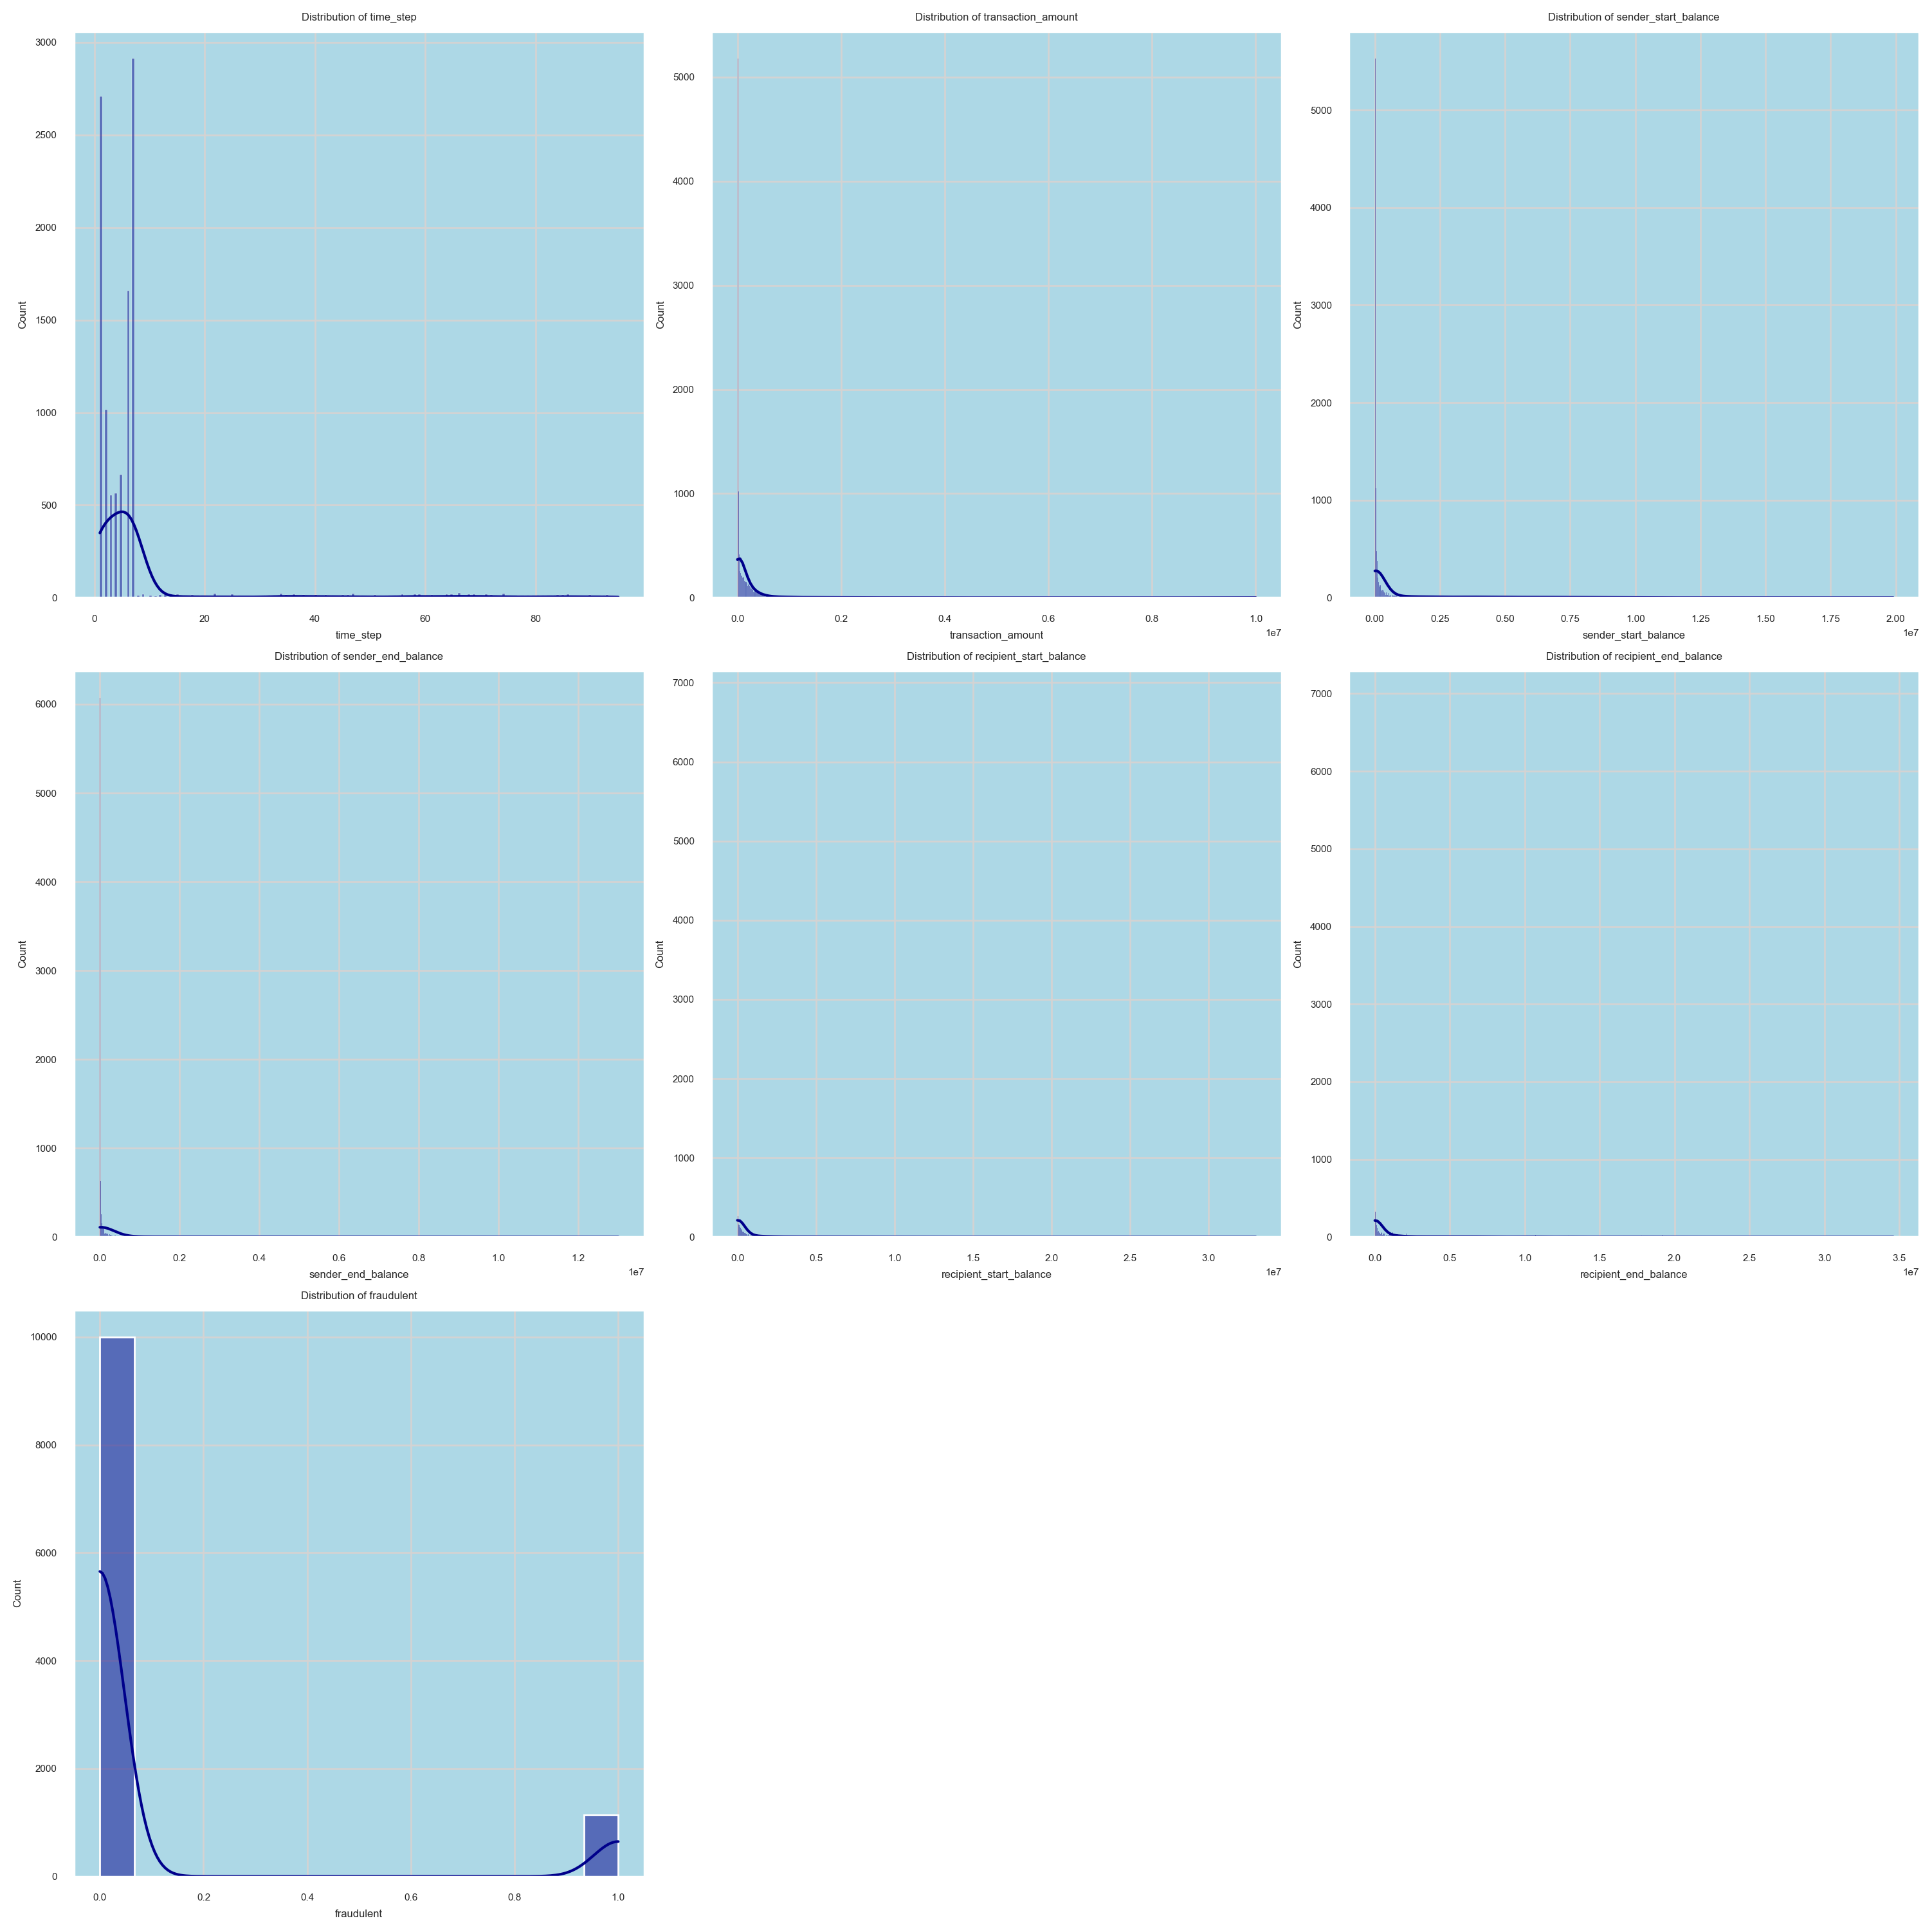

In [497]:

#1. Univariate Analysis for Numerical Features


# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features)
ncols = 3  # Number of columns for subplots
nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Flatten the axes array for easier indexing
ax = ax.flatten()

# Loop through numerical features and plot
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=ax[i], color='darkblue')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].grid(color='lightgrey')

# Turn off any empty subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


Skipping sender because it has too many unique categories.
Skipping recipient because it has too many unique categories.


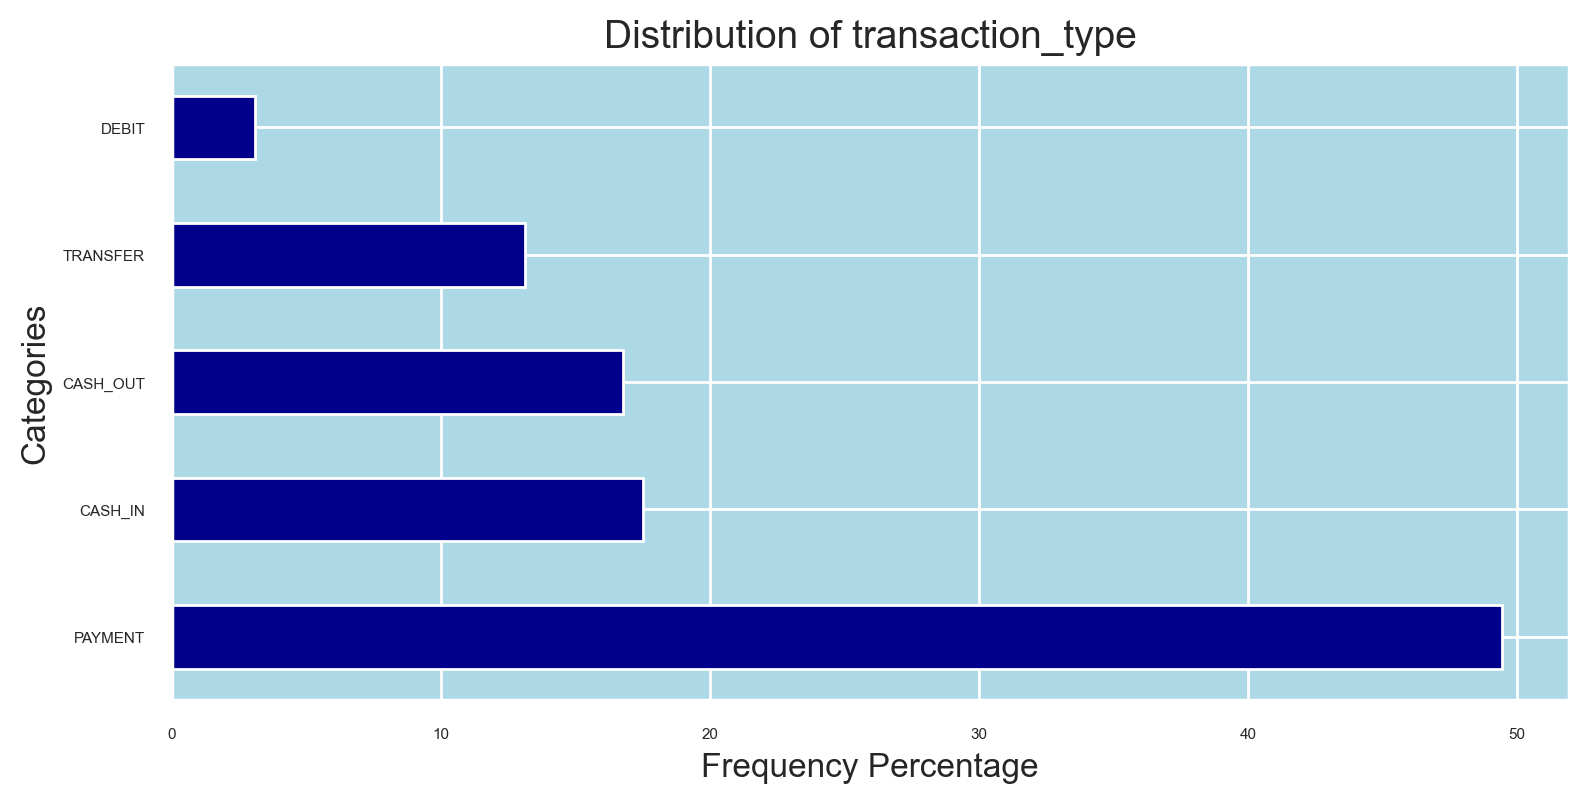

In [498]:
# Set the threshold for maximum unique values to plot
max_unique_values = 20  # Display only features with up to 20 unique categories
top_n_categories = 10   # Show only the top 10 categories if there are more than 10

# Calculate the number of rows and columns needed for subplots
num_categorical_features = sum(df[cat].nunique() <= max_unique_values for cat in categorical_features)
ncols = 2  # Number of columns for subplots
nrows = (num_categorical_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create subplots dynamically
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))

# Flatten the axes array for easier indexing
ax = ax.flatten()

plot_index = 0  # Track the plot index
for col in categorical_features:
    # Filter out columns with too many unique values
    if df[col].nunique() > max_unique_values:
        print(f"Skipping {col} because it has too many unique categories.")
        continue
    
    # Calculate frequency percentages and limit to top N categories
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(top_n_categories)

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[plot_index], color='darkblue')
    
    # Set plot titles and labels
    ax[plot_index].set_title(f'Distribution of {col}', fontsize=14)
    ax[plot_index].set_xlabel('Frequency Percentage', fontsize=12)
    ax[plot_index].set_ylabel('Categories', fontsize=12)
    
    plot_index += 1  # Move to the next plot index

# Remove any unused subplots
for j in range(plot_index, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


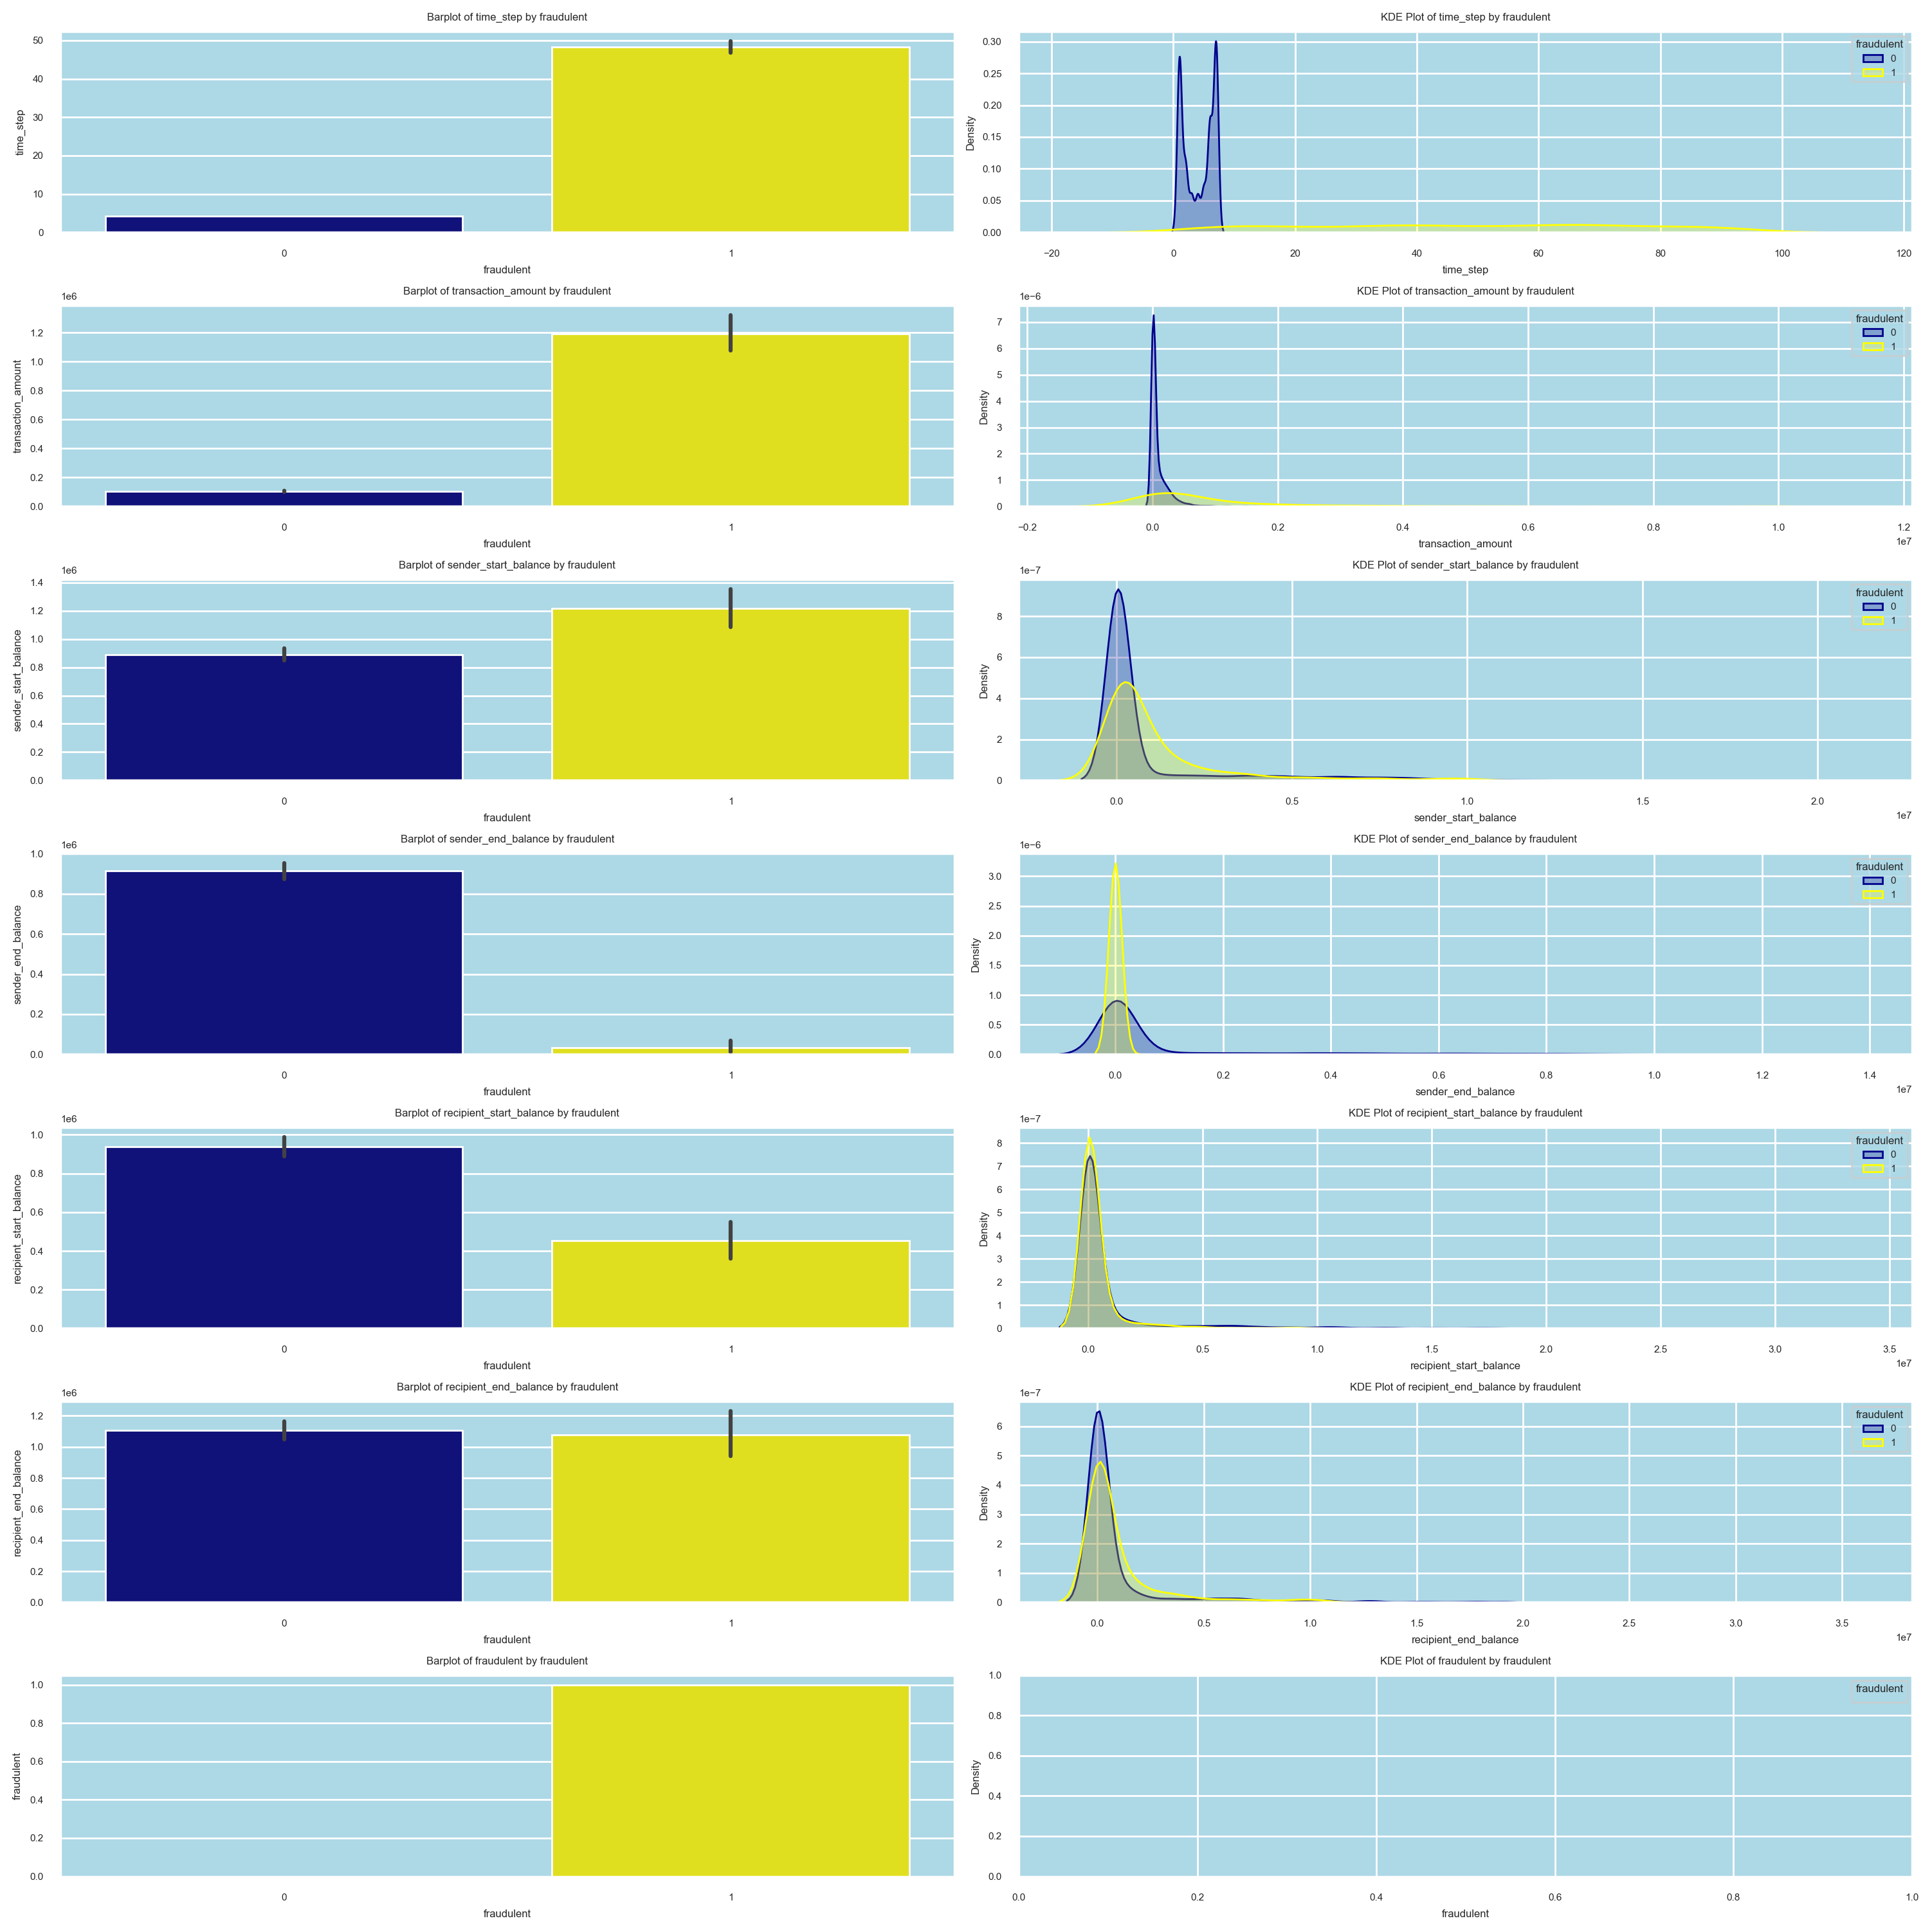

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'target' is correctly defined in your DataFrame and matches your actual target column
target_col = 'fraudulent'

# Create subplots for each numerical feature to show bar plots and KDE plots
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(15, 15))

# Loop through each numerical feature to create barplots and kde plots
for i, col in enumerate(numerical_features):
    # Check if the column exists in the DataFrame
    if col not in df.columns:
        raise ValueError(f"Column {col} does not exist in the DataFrame")
    
    # Barplot showing the mean value of the feature for each target category
    sns.barplot(x=target_col, y=col, data=df, ax=ax[i, 0], palette=['darkblue', 'yellow'])
    ax[i, 0].set_title(f'Barplot of {col} by {target_col}')
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(df.loc[df[target_col] == 0, col], ax=ax[i, 1], fill=True, color='darkblue', label='0')
    sns.kdeplot(df.loc[df[target_col] == 1, col], ax=ax[i, 1], fill=True, color='yellow', label='1')
    ax[i, 1].set_title(f'KDE Plot of {col} by {target_col}')
    ax[i, 1].legend(title=target_col, loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


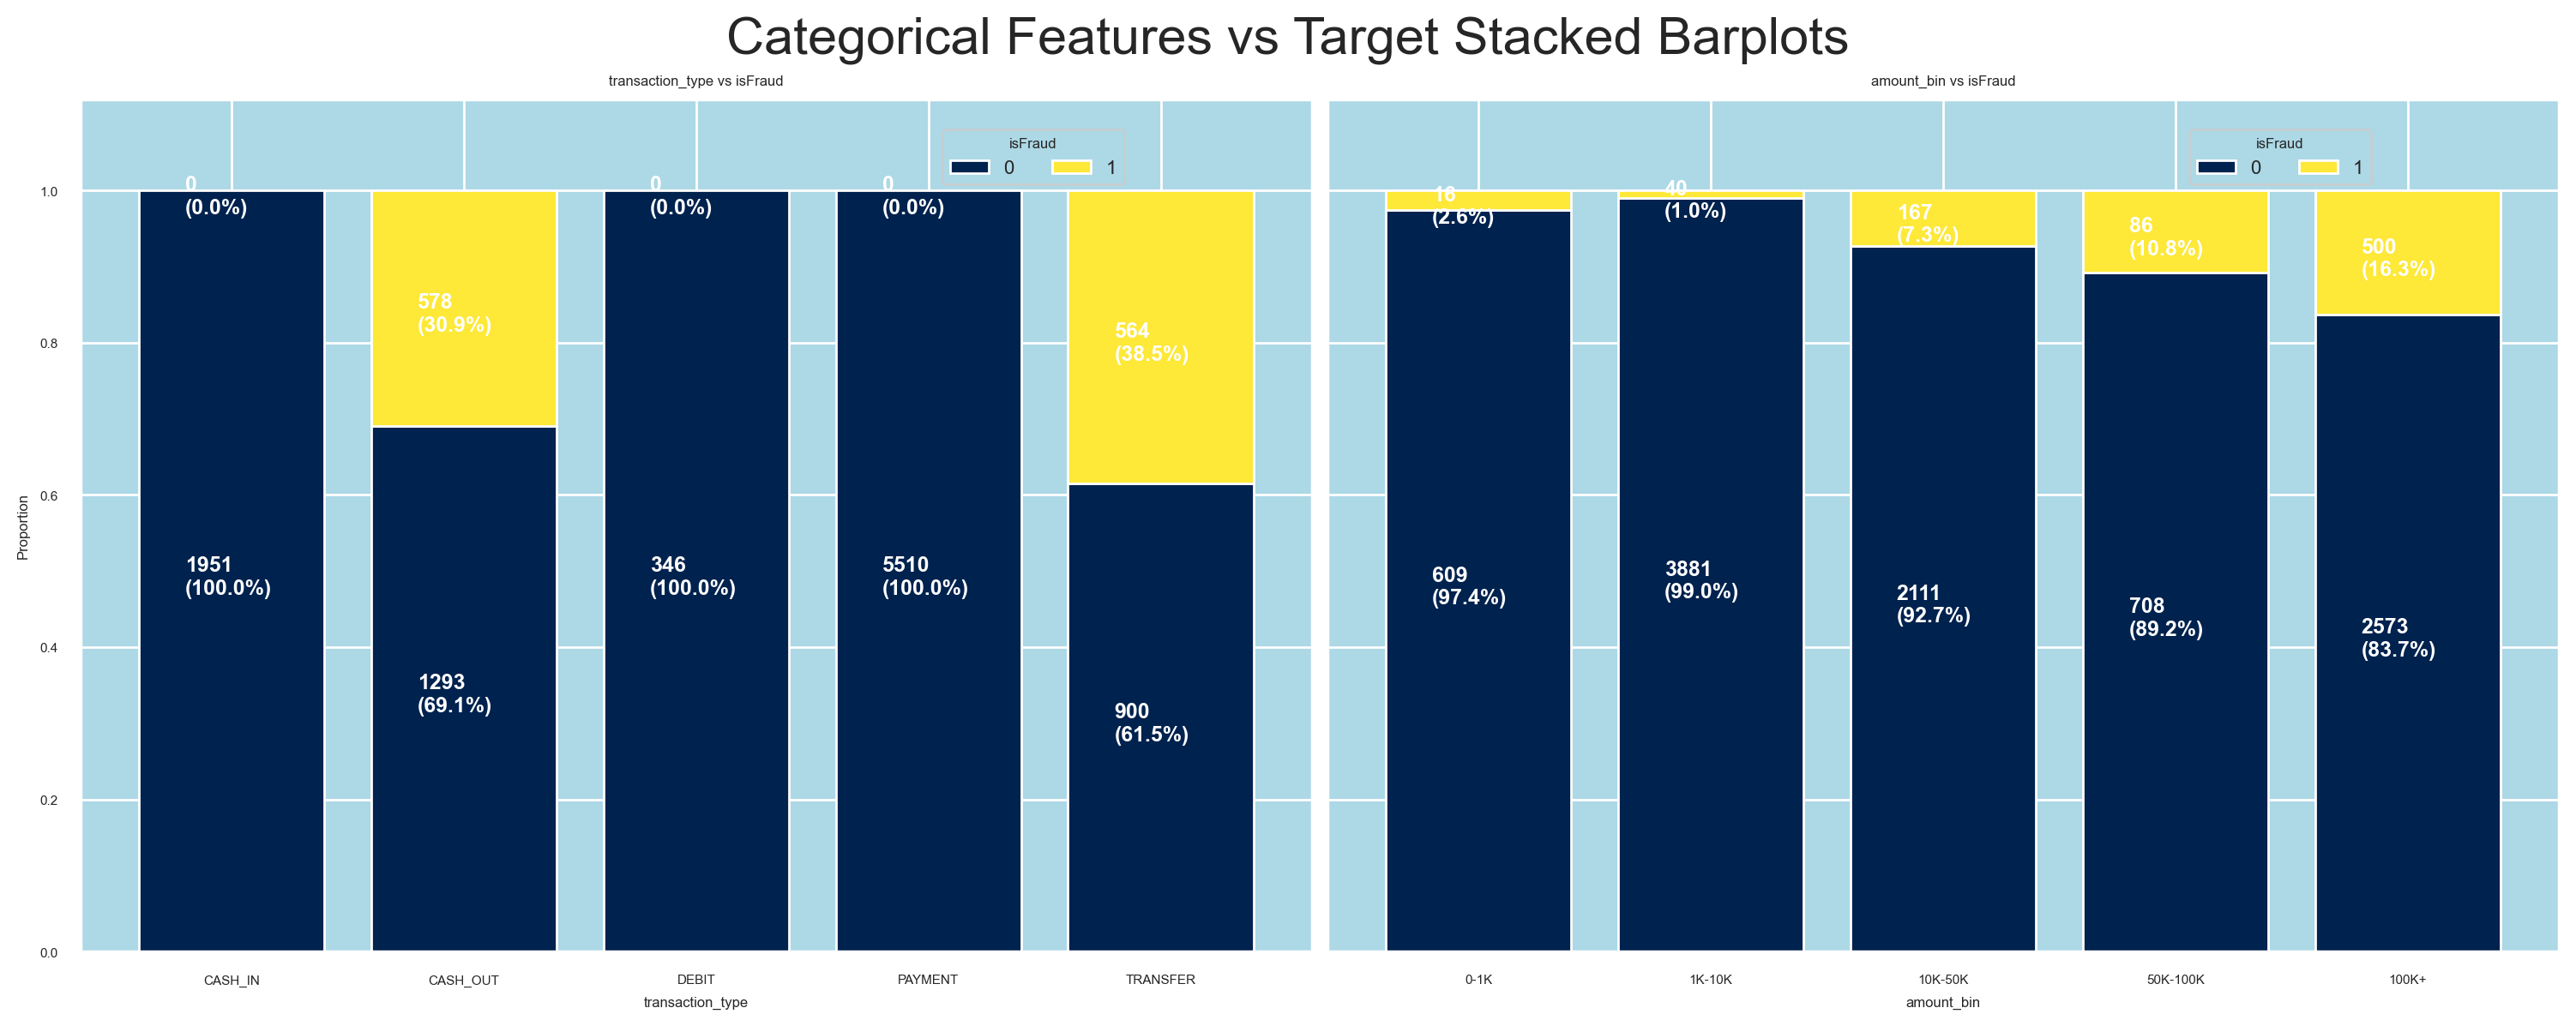

In [500]:

# Create a new categorical feature by binning the 'amount' column into ranges
df['amount_bin'] = pd.cut(df['transaction_amount'], bins=[0, 1000, 10000, 50000, 100000,1000000], 
                          labels=['0-1K', '1K-10K', '10K-50K', '50K-100K', '100K+'])

# Define categorical features (including the new 'amount_bin')
categorical_features = ['transaction_type', 'amount_bin']

# Plot setup
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for i, col in enumerate(categorical_features):
    # Cross-tabulation of categorical feature vs target
    cross_tab = pd.crosstab(index=df[col], columns=df['fraudulent'])
    
    # Proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['fraudulent'], normalize='index')
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar chart
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap='cividis',
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add proportions and counts to the plot
    for idx, val in enumerate(cross_tab.index.values):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[i].text(x=idx-0.2, y=(y_location-proportion)+(proportion/2)-0.03,
                       s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                       color="white", fontsize=9, fontweight="bold")
    
    # Add legend and formatting
    ax[i].legend(title='isFraud', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0, 1.12])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
    ax[i].set_title(f'{col} vs isFraud')

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


In [501]:
df

,time_step,transaction_type,transaction_amount,sender,sender_start_balance,sender_end_balance,recipient,recipient_start_balance,recipient_end_balance,fraudulent,amount_bin
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0-1K
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0-1K
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,1K-10K
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,1K-10K
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,10K-50K
...,...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0,1K-10K
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0,100K+
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0,100K+
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0,1K-10K


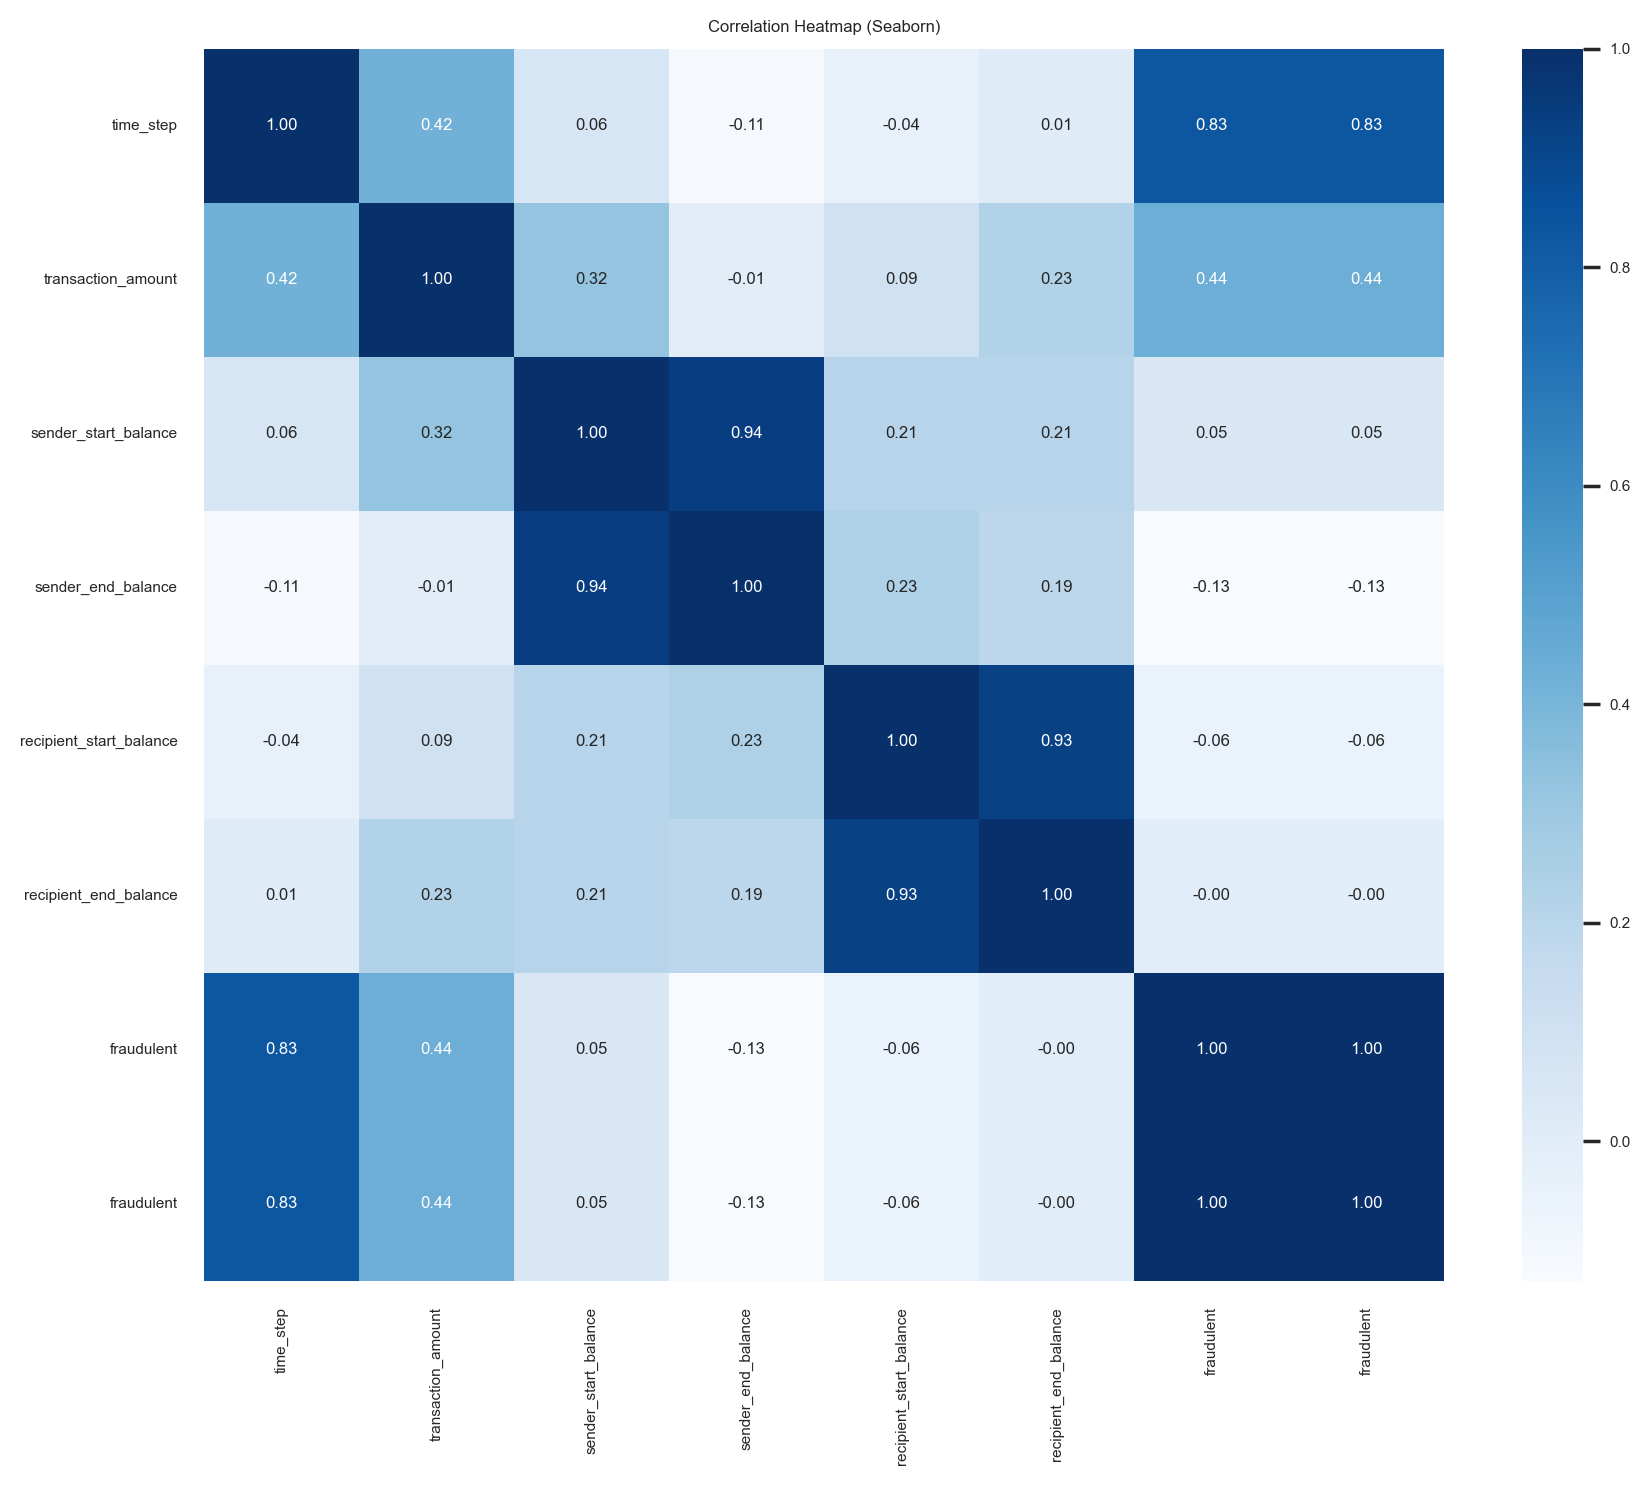

In [502]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + [target_col]].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="bivariate"></a>
# <b><span style='color:#ADD8E6'>Step 5.1 | Irrelevent Features Removal</span><span style='color:#ADD8E6'> Bivariate Analysis</span></b>

In [503]:
df = df.drop(['amount_bin','sender','recipient'],axis=1)


In [504]:
df

,time_step,transaction_type,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent
0,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
1,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
2,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
3,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
4,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,433084.38,426690.68,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,426690.68,127891.14,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,127891.14,0.00,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,13918.00,12823.97,0.00,0.00,0


____
<a id="bivariate"></a>
# <b><span style='color:#ADD8E6'>Step 5.2 | Missing Value Treatment</span><span style='color:#ADD8E6'> Bivariate Analysis</span></b>

In [505]:
# Check for missing values in the dataset
df.isnull().sum()

time_step                  0
transaction_type           0
transaction_amount         0
sender_start_balance       0
sender_end_balance         0
recipient_start_balance    0
recipient_end_balance      0
fraudulent                 0
dtype: int64

In [506]:
df.isnull().sum().sum()

0

____
<a id="bivariate"></a>
# <b><span style='color:#ADD8E6'>Step 5.3 | Outlier Treatment</span><span style='color:#ADD8E6'> Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [507]:
numerical_features

['time_step',
 'transaction_amount',
 'sender_start_balance',
 'sender_end_balance',
 'recipient_start_balance',
 'recipient_end_balance',
 'fraudulent']

In [508]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

time_step                   975
transaction_amount         1172
sender_start_balance       2195
sender_end_balance         2245
recipient_start_balance    1921
recipient_end_balance      2214
fraudulent                 1142
dtype: int64

In [509]:
df2=df.drop('fraudulent',axis=1)

In [510]:
# Imputing outliers with median  
def replace_outliers_with_median(df):
    for column in df2.columns:
        if df2[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1 = df2[column].quantile(0.25)
            Q3 = df2[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with median
            median = df2[column].median()
            df2[column] = df2[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

# Apply the function to the loaded DataFrame
df_imputed = replace_outliers_with_median(df2)

In [511]:
df2['fraudulent']= df['fraudulent']

In [512]:
Q1 = df2[numerical_features].quantile(0.25)
Q3 = df2[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df2[numerical_features] < (Q1 - 1.5 * IQR)) | (df2[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

time_step                     0
transaction_amount         1421
sender_start_balance       1612
sender_end_balance         1926
recipient_start_balance    2762
recipient_end_balance      2535
fraudulent                 1142
dtype: int64

In [513]:
# Perform one-hot encoding on the 'type' column
encoded_data = pd.get_dummies(df2, columns=['transaction_type'])

 #Convert boolean columns to integer (0 and 1)
encoded_data = encoded_data.astype(int)

encoded_data.head()

,time_step,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent,transaction_type_CASH_IN,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
0,1,181,181,0,0,0,1,0,0,0,0,1
1,1,181,181,0,21182,0,1,0,1,0,0,0
2,1,2806,2806,0,0,0,1,0,0,0,0,1
3,1,2806,2806,0,26202,0,1,0,1,0,0,0
4,1,20128,20128,0,0,0,1,0,0,0,0,1


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
Upon identifying outliers for the specified continuous features, we found the following:

amount: 1172 outliers

oldbalanceOrg: 2195 outliers

newbalanceOrig: 2245 outliers

oldbalanceDest: 1921 outliers

newbalanceDest: 2214 outliers
</div>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=darkblue>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
    
* __K-Nearest Neighbors (KNN)__: KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.
    
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=darkblue>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    
    
* __Transformations__: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.
    
    
* __Robust Scaling__: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

In [514]:
# Define the features (X) and the output labels (y)
X = encoded_data.drop('fraudulent', axis=1)
y = encoded_data['fraudulent'] 

In [515]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [516]:
print('x_train :' , X_train.shape)
print('x_test :' , X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :' , y_test.shape)

x_train : (8913, 11)
x_test : (2229, 11)
y_train : (8913,)
y_test : (2229,)


<a id="dt"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:#ADD8E6'>Step 6.1 |</span><span style='color:#ADD8E6'> DT Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

First, let's define the base DT model:

In [517]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

____
<a id="dt_hp"></a>
# <b><span style='color:#ADD9E6'>Step 6.2 |</span><span style='color:#ADD9E6'> DT  Hyperparameter Tuning</span></b>

In [518]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [519]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [520]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [521]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


____
<a id="dt_eval"></a>
# <b><span style='color:#ADD8E6'>Step 6.3 |</span><span style='color:#ADD8E6'> DT Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Now let's evaluate our DT model performance on both the training and test datasets:

In [522]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7999
           1       0.78      0.90      0.84       914

    accuracy                           0.96      8913
   macro avg       0.89      0.94      0.91      8913
weighted avg       0.97      0.96      0.97      8913



In [523]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.71      0.82      0.76       228

    accuracy                           0.95      2229
   macro avg       0.84      0.89      0.86      2229
weighted avg       0.95      0.95      0.95      2229



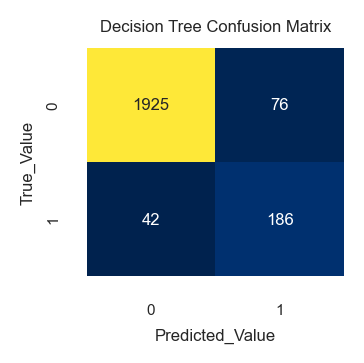

In [524]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="cividis", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [525]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [526]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.98,0.71,0.96,0.82,0.97,0.76,0.84,0.89,0.86,0.95


<a id="rf"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:#ADD8E6'>Step 7.1 |</span><span style='color:#ADD8E6'> RF Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

First, let's define the base RF model:

In [527]:
rf_base = RandomForestClassifier(random_state=9)

____
<a id="rf_hp"></a>
# <b><span style='color:#ADD8E6'>Step 7.2 |</span><span style='color:#ADD8E6'> RF Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Afterward, I am setting up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our RF model:

In [528]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [529]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


____
<a id="rf_eval"></a>
# <b><span style='color:#ADD8E6'>Step 7.3 |</span><span style='color:#ADD8E6'> RF Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Finally, I am evaluating the model's performance on both the training and test datasets:

In [530]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.95      0.84      0.90       914

    accuracy                           0.98      8913
   macro avg       0.97      0.92      0.94      8913
weighted avg       0.98      0.98      0.98      8913



In [531]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2001
           1       0.92      0.76      0.83       228

    accuracy                           0.97      2229
   macro avg       0.95      0.88      0.91      2229
weighted avg       0.97      0.97      0.97      2229



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [532]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.97,0.92,0.99,0.76,0.98,0.83,0.95,0.88,0.91,0.97


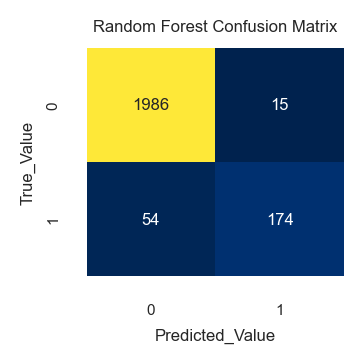

In [533]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="cividis", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<a id="logistic"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Logistic Regression Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="logistic_base"></a>
# <b><span style='color:#ADD8E6'>Step 8.1 |</span><span style='color:#ADD8E6'> Logistic Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

First of all, let's define the base LR model and set up the pipeline with scaling:

In [534]:
# Define the base logistic model and set up the pipeline with scaling
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

____
<a id="logistic_hp"></a>
# <b><span style='color:#ADD8E6'>Step 8.2 |</span><span style='color:#ADD8E6'> Logistic Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our Logistic pipeline:

In [535]:
# Hyperparameter grid for Logistic Regression
# penalty - determines the regularization, and helps prevent overfitting by adding a penalty to the optimization objective.
# 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization
# 'C' - inverse of the regularization strength, smaller values specify stronger regularization
# 'solver' - algorithm used for optimization in LR,  'liblinear' is suitable for small datasets, 'saga' for larger dataset
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

In [536]:
logistic_base=LogisticRegression()

In [537]:
# Call the function for hyperparameter tuning with logistic regression
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, X_train, y_train)

# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


____
<a id="logistic_eval"></a>
# <b><span style='color:#ADD8E6'>Step 8.3 |</span><span style='color:#ADD8E6'> Logistic Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Let's evaluate the model's performance on both the training and test datasets:

In [538]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7999
           1       0.86      0.88      0.87       914

    accuracy                           0.97      8913
   macro avg       0.93      0.93      0.93      8913
weighted avg       0.97      0.97      0.97      8913



In [539]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.85      0.87      0.86       228

    accuracy                           0.97      2229
   macro avg       0.92      0.93      0.92      2229
weighted avg       0.97      0.97      0.97      2229



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

The Logistic model's consistent scores across training and test sets indicate no overfitting.

In [540]:
logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
logistic_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.98,0.85,0.98,0.87,0.98,0.86,0.92,0.93,0.92,0.97


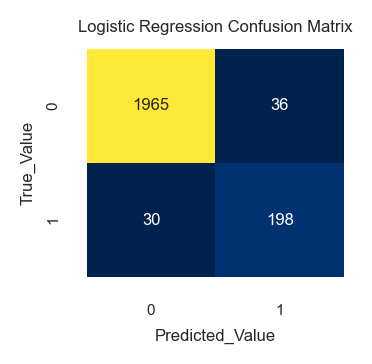

In [541]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_lr = confusion_matrix(y_test,best_logistic.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_lr,annot=True,fmt='d', cmap="cividis", cbar=False)
plt.title('Logistic Regression Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<a id="svm"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | SVM Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:#ADD8E6'>Step 9.1 |</span><span style='color:#ADD8E6'> SVM Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

First, let's define the base SVM model and set up the pipeline with scaling:

In [542]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

____
<a id="svm_hp"></a>
# <b><span style='color:#ADD8E6'>Step 9.2 |</span><span style='color:#ADD8E6'> SVM Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Let's configure the hyperparameters grid and employ the __tune_clf_hyperparameters__ function to determine the best hyperparameters for our SVM pipeline:

In [543]:
param_grid_svm = {
    'svm__C': [5],
    'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__gamma': [2],
#     'svm__degree': [2,3,4]
}

In [544]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 5, 'svm__kernel': 'poly'}


____
<a id="svm_eval"></a>
# <b><span style='color:#ADD8E6'>Step 9.3 |</span><span style='color:#ADD8E6'> SVM Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Let's evaluate our SVM model's performance on both the training and test datasets:

In [545]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7999
           1       0.94      0.96      0.95       914

    accuracy                           0.99      8913
   macro avg       0.97      0.98      0.97      8913
weighted avg       0.99      0.99      0.99      8913



In [546]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.89      0.91      0.90       228

    accuracy                           0.98      2229
   macro avg       0.94      0.95      0.94      2229
weighted avg       0.98      0.98      0.98      2229



In [547]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.99,0.89,0.99,0.91,0.99,0.9,0.94,0.95,0.94,0.98


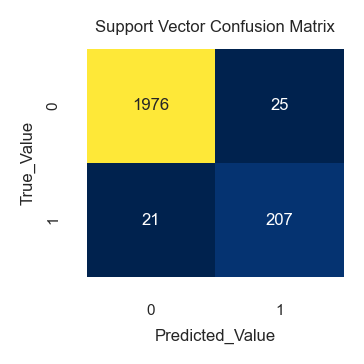

In [548]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="cividis", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

____
<a id="svm_eval"></a>
# <b><span style='color:#ADD8E6'>Step 9.3 |</span><span style='color:#ADD8E6'> XG Boost </span></b>

In [549]:

# Initializing the XGBoost classifier with basic parameters
xgb_model = xgb.XGBClassifier()


In [550]:

# Define the parameter grid
param_grid_xg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [551]:
# Call the function for hyperparameter tuning
best_XG, best_XG_hyperparams = tune_clf_hyperparameters(xgb_model, param_grid_xg, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_XG_hyperparams)

SVM Optimal Hyperparameters: 
 {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [552]:
xg_evaluation = evaluate_model(best_XG,X_test,y_test,'XG')

<a id="conclusion"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

In [553]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation, svm_evaluation,xg_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
XG,1.00,0.98,1.00,0.97,1.00,0.98,0.99,0.99,0.99,1.00
SVM,0.99,0.89,0.99,0.91,0.99,0.90,0.94,0.95,0.94,0.98
LR,0.98,0.85,0.98,0.87,0.98,0.86,0.92,0.93,0.92,0.97
DT,0.98,0.71,0.96,0.82,0.97,0.76,0.84,0.89,0.86,0.95
RF,0.97,0.92,0.99,0.76,0.98,0.83,0.95,0.88,0.91,0.97


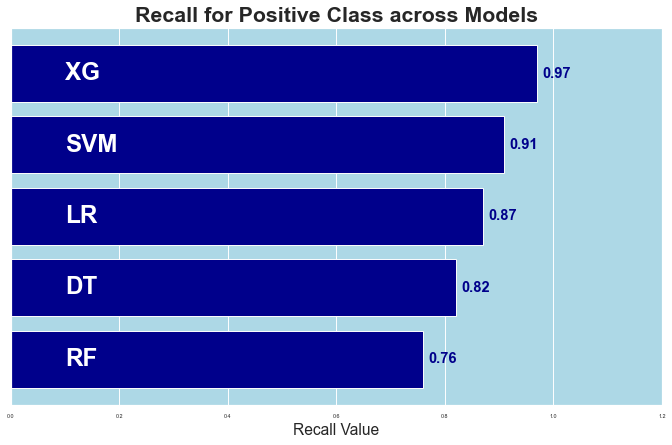

In [554]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='darkblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='darkblue', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<a id="prediction"></a>
# <p style="background-color:#ADD8E6; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Prediction</p>

⬆️ [Table of Contents](#contents_tabel)

In [558]:
encoded_data[encoded_data['fraudulent']==1].head(110)

,time_step,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent,transaction_type_CASH_IN,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
0,1,181,181,0,0,0,1,0,0,0,0,1
1,1,181,181,0,21182,0,1,0,1,0,0,0
2,1,2806,2806,0,0,0,1,0,0,0,0,1
3,1,2806,2806,0,26202,0,1,0,1,0,0,0
4,1,20128,20128,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,9,1055,1055,0,0,0,1,0,0,0,0,1
106,9,1055,1055,0,75179,0,1,0,1,0,0,0
107,9,244068,244068,0,0,0,1,0,0,0,0,1
108,9,244068,244068,0,0,338538,1,0,1,0,0,0


In [561]:
encoded_data

,time_step,transaction_amount,sender_start_balance,sender_end_balance,recipient_start_balance,recipient_end_balance,fraudulent,transaction_type_CASH_IN,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
0,1,181,181,0,0,0,1,0,0,0,0,1
1,1,181,181,0,21182,0,1,0,1,0,0,0
2,1,2806,2806,0,0,0,1,0,0,0,0,1
3,1,2806,2806,0,26202,0,1,0,1,0,0,0
4,1,20128,20128,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11137,7,6393,433084,4420,478421,210535,0,0,0,1,0,0
11138,7,298799,426690,127891,0,0,0,0,1,0,0,0
11139,7,16761,127891,0,610479,749621,0,0,1,0,0,0
11140,7,1094,13918,12823,0,0,0,0,0,0,1,0


In [560]:
# Function to make a prediction based on user input
def predict(features):
    return best_XG.predict(np.array(features).reshape(1, -1))

# Define feature names
feature_names = ['time_step','transaction_amount','sender_start_balance','sender_end_balance','recipient_start_balance	','recipient_end_balance','transaction_type_CASH_IN','transaction_type_CASH_OUT','transaction_type_DEBIT','transaction_type_PAYMENT','transaction_type_TRANSFER']
# Create input widgets
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in feature_names]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Display the prediction using IPython.display
    with output_widget:
        display(HTML(f"<b>Prediction:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*feature_widgets, predict_button, output_widget)


FloatText(value=0.0, description='time_step:')

FloatText(value=0.0, description='transaction_amount:')

FloatText(value=0.0, description='sender_start_balance:')

FloatText(value=0.0, description='sender_end_balance:')

FloatText(value=0.0, description='recipient_start_balance\t:')

FloatText(value=0.0, description='recipient_end_balance:')

FloatText(value=0.0, description='transaction_type_CASH_IN:')

FloatText(value=0.0, description='transaction_type_CASH_OUT:')

FloatText(value=0.0, description='transaction_type_DEBIT:')

FloatText(value=0.0, description='transaction_type_PAYMENT:')

FloatText(value=0.0, description='transaction_type_TRANSFER:')

Button(description='Predict', style=ButtonStyle())

Output()